<a href="https://colab.research.google.com/github/Anjasfedo/Code-as-a-Cryptography/blob/main/ecc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluate ECC

In [1]:
!pip install eciespy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.0 MB/s eta 0:00:00


In [2]:
import time
import hashlib
import math
from ecies.utils import generate_eth_key
from ecies import encrypt, decrypt

# Function to calculate the avalanche effect by comparing two hashes
def avalanche_effect(message1, message2):
    hash1 = hashlib.sha256(message1.encode()).hexdigest()
    hash2 = hashlib.sha256(message2.encode()).hexdigest()

    # Compare bit differences
    bit_difference = sum(bin(int(h1, 16) ^ int(h2, 16)).count('1') for h1, h2 in zip(hash1, hash2))
    total_bits = len(hash1) * 4  # Each hex character is 4 bits
    return (bit_difference / total_bits) * 100  # Percentage of differing bits

# Function to evaluate encryption and decryption timing
def evaluate_algorithm(public_key_hex, private_key_hex, content):
    try:
        # Timing the encryption process
        start_time = time.time()
        ciphertext = encrypt(public_key_hex, content.encode())
        encryption_time = time.time() - start_time
        print(f"Ciphertext: {ciphertext.hex()}")
        print(f"Encryption Time: {encryption_time:.6f} seconds")

        # Timing the decryption process
        start_time = time.time()
        decrypted_message = decrypt(private_key_hex, ciphertext)
        decryption_time = time.time() - start_time
        print(f"Decrypted Message: {decrypted_message.decode()}")
        print(f"Decryption Time: {decryption_time:.6f} seconds")

        # Check if the decryption is correct
        if decrypted_message.decode() == content:
            print("Decryption successful: Message matches original content.")
        else:
            print("Decryption failed: Message does not match original content.")

    except Exception as e:
        print(f"Error during encryption/decryption: {e}")

    return ciphertext

# Key Strength Evaluation (Binary Distribution of Key)
def key_strength_analysis(key_hex):
    key_bin = bin(int(key_hex, 16))[2:]  # Convert the key from hex to binary
    bit_count = len(key_bin)

    ones = key_bin.count('1')
    zeros = bit_count - ones

    print(f"Key Strength Analysis:")
    print(f"Total Bits: {bit_count}")
    print(f"1's Count: {ones} ({(ones / bit_count) * 100:.2f}%)")
    print(f"0's Count: {zeros} ({(zeros / bit_count) * 100:.2f}%)\n")

# Entropy Calculation for Ciphertext
def calculate_entropy(data):
    """Calculate Shannon entropy of the data."""
    data_bytes = data
    frequency = {}
    for byte in data_bytes:
        frequency[byte] = frequency.get(byte, 0) + 1

    entropy = 0
    data_length = len(data_bytes)
    for freq in frequency.values():
        probability = freq / data_length
        entropy -= probability * math.log2(probability)

    return entropy

# Use the provided content for encryption
CONTENT = "3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup"

# Generate keys
private_key = generate_eth_key()
public_key = private_key.public_key

public_key_hex = public_key.to_hex()
private_key_hex = private_key.to_hex()

print("Public Key:", public_key_hex)
print("Private Key:", private_key_hex)

# Evaluate algorithm performance and correctness
ciphertext = evaluate_algorithm(public_key_hex, private_key_hex, CONTENT)

# Key Strength Analysis (Binary Distribution of Key)
key_strength_analysis(public_key_hex)

# Testing entropy of ciphertext
ciphertext_entropy = calculate_entropy(ciphertext)
print(f"Entropy of Ciphertext: {ciphertext_entropy:.2f} bits")

# Testing avalanche effect
# Slightly change the content (change one character or bit)
modified_content = "3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup!"
print(f"\nOriginal Message: {CONTENT}")
print(f"Modified Message: {modified_content}")

avalanche_percentage = avalanche_effect(CONTENT, modified_content)
print(f"Avalanche Effect: {avalanche_percentage:.2f}% bit difference between original and modified message")


Public Key: 0x354fbf8430c7737ec69ad54e0aa32a21de51490fafcb7735ade86cb122d2e212a39729edec61ef0e370c3124c8bca371c36010d8b49bfc4eb3b29bd8dea74e0d
Private Key: 0x24aac89abbbf94d16a18b454215e3f56166151aae46129331c47c5373d9cbb1a
Ciphertext: 046ca7135ec8b0879e27e66b9f76cd822a5a21f7116c7e3b0152afe03006b327348f84b53e67d04dba93139f1aa1713e5d7c8b8275ae4ee070d800720f18cae398d95e37454cc9e76aeeba949cfa98e811e49197ab9961a079b82ca3b0f7d7670ce9c5f38f17e8478581904aee7044c249a245dfecd74e28e467bc2e1013166a803362100f2f6a989426548fdef7506c988fae9ead0ac7666696a987ed691cb2384794a8b97c80ab948e6f033597c03466e3121a1a9fe7f8f62eea70517fbbd78471bb9d6f5bc1cb6404cdef3fb1b9a41e14ab59f325f734e1bbf055b619e668bef9a000c31e8a1ac00d690cce44221f32db6180d10f57153d51bcef6358ac5d818d7d69e479713e81d3685343eabc73445d
Encryption Time: 0.004184 seconds
Decrypted Message: 3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wn

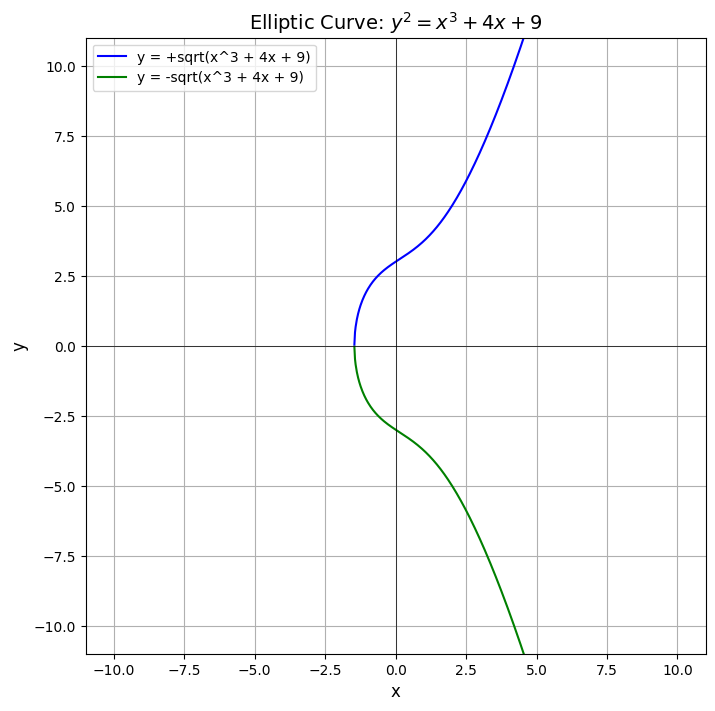

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients for the elliptic curve equation y^2 = x^3 + ax + b
a = 4
b = 9

# Function to calculate the right-hand side of the elliptic curve equation
def elliptic_curve(x, a, b):
    return x**3 + a*x + b

# Generate a denser set of x values to make the curve smoother
x = np.linspace(-11, 11, 1000)

# Calculate y^2 values from the elliptic curve equation y^2 = x^3 + ax + b
y_squared = elliptic_curve(x, a, b)

# Mask values where y^2 is negative, as sqrt can't be applied to negative numbers in real numbers
valid_mask = y_squared >= 0
y_squared_valid = y_squared[valid_mask]
x_valid = x[valid_mask]

# Calculate y values (positive and negative branches) from valid y^2 values
y_positive = np.sqrt(y_squared_valid)
y_negative = -np.sqrt(y_squared_valid)

# Plot the elliptic curve
plt.figure(figsize=(8, 8))
plt.plot(x_valid, y_positive, label="y = +sqrt(x^3 + 4x + 9)", color='blue')
plt.plot(x_valid, y_negative, label="y = -sqrt(x^3 + 4x + 9)", color='green')

# Add labels, title, and legend
plt.title(r'Elliptic Curve: $y^2 = x^3 + 4x + 9$', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Add grid and set limits for better visualization of the negative x-axis
plt.grid(True)
plt.xlim(-11, 11)
plt.ylim(-11, 11)
plt.legend()

# Show the plot
plt.show()

In [4]:
class EllipticCurve:
    def __init__(self, a, b, p):
        self.a = a  # Coefficient 'a' in the elliptic curve equation
        self.b = b  # Coefficient 'b' in the elliptic curve equation
        self.p = p  # Prime number for the finite field (mod p)

    def inverse_mod(self, x, p):
        """Returns the modular inverse of x modulo p, i.e., (1/x) % p."""
        return pow(x, p - 2, p)

    def point_addition(self, P, Q):
        """Adds two points P and Q on the elliptic curve."""
        if P == Q:
            raise ValueError("This method is for point addition, not point doubling.")

        Px, Py = P
        Qx, Qy = Q

        # Ensure points are not the same
        if Px == Qx and Py == Qy:
            raise ValueError("Point doubling needs a separate function.")

        # Calculate the slope (lambda) as (Qy - Py) / (Qx - Px)
        slope = (Qy - Py) * self.inverse_mod(Qx - Px, self.p) % self.p

        # Calculate Rx using the point addition formula
        Rx = (slope ** 2 - Px - Qx) % self.p

        # Calculate Ry using the point addition formula
        Ry = (slope * (Px - Rx) - Py) % self.p

        # Return the resulting point R = (Rx, Ry)
        return (Rx, Ry)

# Example elliptic curve parameters and points for Google Colab

# Elliptic curve: y^2 = x^3 + ax + b over a finite field Fp
a = 2  # coefficient 'a'
b = 3  # coefficient 'b'
p = 97 # prime number (mod p for finite field)

# Create the elliptic curve object
curve = EllipticCurve(a, b, p)

# Define two points P and Q on the elliptic curve
P = (3, 6)
Q = (10, 20)

# Perform point addition on P and Q
R = curve.point_addition(P, Q)

# Display the result
R


(88, 18)

In [5]:
class EllipticCurve:
    def __init__(self, a, b, p):
        self.a = a  # Coefficient 'a' in the elliptic curve equation
        self.b = b  # Coefficient 'b' in the elliptic curve equation
        self.p = p  # Prime number for the finite field (mod p)

    def inverse_mod(self, x, p):
        """Returns the modular inverse of x modulo p, i.e., (1/x) % p."""
        return pow(x, p - 2, p)

    def point_addition(self, P, Q):
        """Adds two points P and Q on the elliptic curve."""
        if P == Q:
            raise ValueError("This method is for point addition, not point doubling.")

        Px, Py = P
        Qx, Qy = Q

        # Ensure points are not the same
        if Px == Qx and Py == Qy:
            raise ValueError("Point doubling needs a separate function.")

        # Calculate the slope (lambda) as (Qy - Py) / (Qx - Px)
        slope = (Qy - Py) * self.inverse_mod(Qx - Px, self.p) % self.p

        # Calculate Rx using the point addition formula
        Rx = (slope ** 2 - Px - Qx) % self.p

        # Calculate Ry using the point addition formula
        Ry = (slope * (Px - Rx) - Py) % self.p

        # Return the resulting point R = (Rx, Ry)
        return (Rx, Ry)

    def point_doubling(self, P):
        """Doubles a point P on the elliptic curve."""
        Px, Py = P

        # Slope (lambda) for point doubling
        slope = (3 * Px**2 + self.a) * self.inverse_mod(2 * Py, self.p) % self.p

        # Calculate Rx using the point doubling formula
        Rx = (slope ** 2 - 2 * Px) % self.p

        # Calculate Ry using the point doubling formula
        Ry = (slope * (Px - Rx) - Py) % self.p

        # Return the resulting point R = (Rx, Ry)
        return (Rx, Ry)

    def point_negation(self, P):
        """Returns the negation of a point P(x, y) -> -P(x, -y)."""
        Px, Py = P
        return (Px, -Py % self.p)

    def point_subtraction(self, P, Q):
        """Subtracts point Q from P on the elliptic curve using P - Q = P + (-Q)."""
        neg_Q = self.point_negation(Q)
        return self.point_addition(P, neg_Q)

    def point_multiplication(self, k, P):
        """Multiplies a point P by an integer k using repeated point addition."""
        result = None
        addend = P

        while k:
            if k & 1:
                if result is None:
                    result = addend
                else:
                    result = self.point_addition(result, addend)

            # Point doubling
            addend = self.point_doubling(addend)

            # Move to the next bit
            k >>= 1

        return result


# Example elliptic curve parameters and points for Google Colab

# Elliptic curve: y^2 = x^3 + ax + b over a finite field Fp
a = 2  # coefficient 'a'
b = 3  # coefficient 'b'
p = 97 # prime number (mod p for finite field)

# Create the elliptic curve object
curve = EllipticCurve(a, b, p)

# Define two points P and Q on the elliptic curve
P = (3, 6)
Q = (10, 20)

# Perform point addition
R_add = curve.point_addition(P, Q)

# Perform point doubling
R_double = curve.point_doubling(P)

# Perform point subtraction
R_subtract = curve.point_subtraction(P, Q)

# Perform point multiplication (e.g., 5 * P)
R_multiplication = curve.point_multiplication(5, P)

# Display the results
R_add, R_double, R_subtract, R_multiplication


((88, 18), (80, 10), (78, 37), (91, 91))

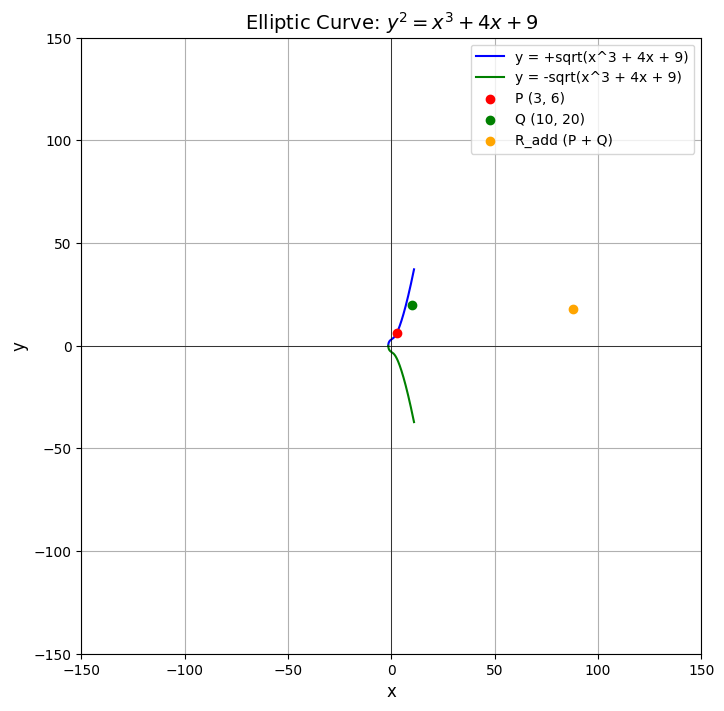

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the elliptic curve equation y^2 = x^3 + ax + b
def elliptic_curve(x, a, b):
    return x**3 + a*x + b

# Class for elliptic curve operations, including point addition
class EllipticCurve:
    def __init__(self, a, b, p):
        self.a = a  # Coefficient 'a' in the elliptic curve equation
        self.b = b  # Coefficient 'b' in the elliptic curve equation
        self.p = p  # Prime number for the finite field (mod p)

    def inverse_mod(self, x, p):
        """Returns the modular inverse of x modulo p."""
        return pow(x, p - 2, p)

    def point_addition(self, P, Q):
        """Adds two points P and Q on the elliptic curve."""
        Px, Py = P
        Qx, Qy = Q

        # Calculate the slope (lambda) as (Qy - Py) / (Qx - Px)
        slope = (Qy - Py) * self.inverse_mod(Qx - Px, self.p) % self.p

        # Calculate Rx using the point addition formula
        Rx = (slope ** 2 - Px - Qx) % self.p

        # Calculate Ry using the point addition formula
        Ry = (slope * (Px - Rx) - Py) % self.p

        # Return the resulting point R = (Rx, Ry)
        return (Rx, Ry)

# Coefficients for the elliptic curve equation y^2 = x^3 + ax + b
a = 4
b = 9
p = 97  # Modulo prime for field

# Create the elliptic curve object
curve = EllipticCurve(a, b, p)

# Define two points P and Q on the elliptic curve
P = (3, 6)
Q = (10, 20)

# Perform point addition
R_add = curve.point_addition(P, Q)

# Generate a denser set of x values to make the curve smoother
x = np.linspace(-11, 11, 1000)

# Calculate y^2 values from the elliptic curve equation y^2 = x^3 + ax + b
y_squared = elliptic_curve(x, a, b)

# Mask values where y^2 is negative, as sqrt can't be applied to negative numbers in real numbers
valid_mask = y_squared >= 0
y_squared_valid = y_squared[valid_mask]
x_valid = x[valid_mask]

# Calculate y values (positive and negative branches) from valid y^2 values
y_positive = np.sqrt(y_squared_valid)
y_negative = -np.sqrt(y_squared_valid)

# Plot the elliptic curve
plt.figure(figsize=(8, 8))
plt.plot(x_valid, y_positive, label="y = +sqrt(x^3 + 4x + 9)", color='blue')
plt.plot(x_valid, y_negative, label="y = -sqrt(x^3 + 4x + 9)", color='green')

# Plot points P, Q, and R_add
plt.scatter(*P, color="red", label="P (3, 6)", zorder=5)
plt.scatter(*Q, color="green", label="Q (10, 20)", zorder=5)
plt.scatter(*R_add, color="orange", label="R_add (P + Q)", zorder=5)

# Add labels, title, and legend
plt.title(r'Elliptic Curve: $y^2 = x^3 + 4x + 9$', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Add grid and set limits for better visualization of the negative x-axis
plt.grid(True)
plt.xlim(-150, 150)
plt.ylim(-150, 150)
plt.legend()

# Show the plot
plt.show()


In [7]:
def is_valid_elliptic_curve(a, b, p):
    """Check if the elliptic curve y^2 = x^3 + ax + b is non-singular mod p."""
    discriminant = (4 * a**3 + 27 * b**2) % p
    return discriminant != 0

# Example values
a = 2
b = 3
p = 97  # A prime number for the finite field

# Check if the curve is valid
if is_valid_elliptic_curve(a, b, p):
    print(f"The elliptic curve y^2 = x^3 + {a}x + {b} is non-singular mod {p}.")
else:
    print(f"The elliptic curve y^2 = x^3 + {a}x + {b} is singular mod {p}.")


The elliptic curve y^2 = x^3 + 2x + 3 is non-singular mod 97.


In [8]:
def elliptic_curve(x, a, b):
    return x**3 + a*x + b

In [9]:
def point_addition(P, Q, p):
    """
    Adds two points P and Q on an elliptic curve over a finite field of prime p.

    P = (Px, Py), Q = (Qx, Qy)
    p is the prime number for the finite field (mod p).
    """
    Px, Py = P
    Qx, Qy = Q

    # Ensure that the points are not identical
    if Px == Qx and Py == Qy:
        raise ValueError("Use point doubling when P == Q")

    # Compute the slope (lambda) as (Qy - Py) / (Qx - Px) mod p
    slope = ((Qy - Py) * pow(Qx - Px, p - 2, p)) % p  # Using modular inverse

    # Compute Rx
    Rx = (slope**2 - Px - Qx) % p

    # Compute Ry
    Ry = (slope * (Px - Rx) - Py) % p

    return (Rx, Ry)

# Example points P and Q on the curve
P = (3, 6)
Q = (10, 20)
p = 97  # Prime modulus for the finite field

# Perform point addition
R_add = point_addition(P, Q, p)
print(f"R_add = P + Q = {R_add}")


R_add = P + Q = (88, 18)


# Equation to Code

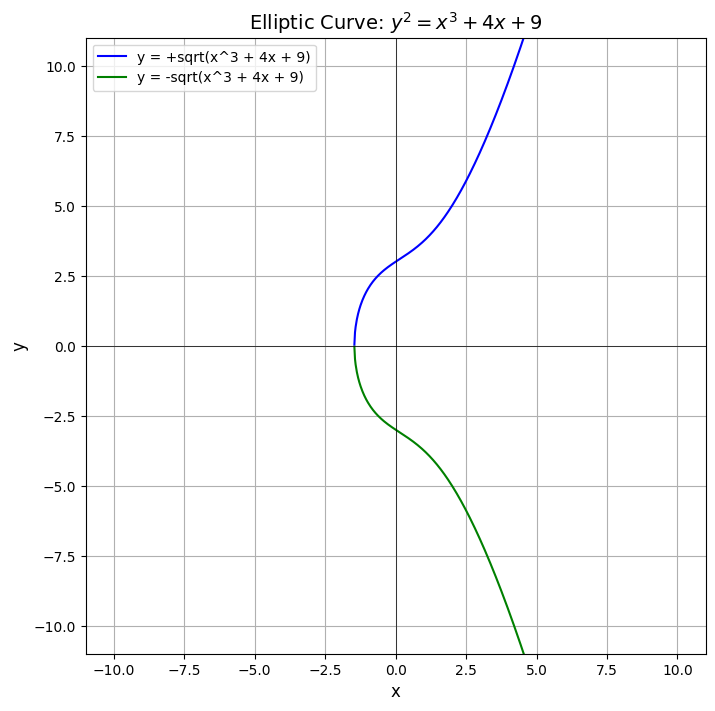

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients for the elliptic curve equation y^2 = x^3 + ax + b
a = 4
b = 9

# Function to calculate the right-hand side of the elliptic curve equation
def elliptic_curve(x, a, b):
    return x**3 + a*x + b

# Generate a denser set of x values to make the curve smoother
x = np.linspace(-11, 11, 1000)

# Calculate y^2 values from the elliptic curve equation y^2 = x^3 + ax + b
y_squared = elliptic_curve(x, a, b)

# Mask values where y^2 is negative, as sqrt can't be applied to negative numbers in real numbers
valid_mask = y_squared >= 0
y_squared_valid = y_squared[valid_mask]
x_valid = x[valid_mask]

# Calculate y values (positive and negative branches) from valid y^2 values
y_positive = np.sqrt(y_squared_valid)
y_negative = -np.sqrt(y_squared_valid)

# Plot the elliptic curve
plt.figure(figsize=(8, 8))
plt.plot(x_valid, y_positive, label="y = +sqrt(x^3 + 4x + 9)", color='blue')
plt.plot(x_valid, y_negative, label="y = -sqrt(x^3 + 4x + 9)", color='green')

# Add labels, title, and legend
plt.title(r'Elliptic Curve: $y^2 = x^3 + 4x + 9$', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Add grid and set limits for better visualization of the negative x-axis
plt.grid(True)
plt.xlim(-11, 11)
plt.ylim(-11, 11)
plt.legend()

# Show the plot
plt.show()

In [11]:
# y^2 = x^3 + 2x + 4

# P + Q = R
# P = (xp, yp)
# Q = (xq, yq)
# R = (xr, yr)

In [12]:
# m = (yp - yq) / (xp - xq)
def calculate_m(P, Q):
  xp, yp = P
  xq, yq = Q

  m = (yp - yq) / (xp - xq)
  return m

# e.g. P(2, 4) and Q(0, 2)
P = (2, 4)
Q = (0, 2)

m = calculate_m(P, Q)
m

1.0

In [13]:
# xr = m^2 - xp - xq
def calculate_xr(m, P, Q):
  xp, yp = P
  xq, yq = Q

  xr = m**2 - xp - xq
  return xr

xr = calculate_xr(m, P, Q)
xr

-1.0

In [14]:
# yr = m(xp - xr) - yp
def calculate_yr(m, P, Q):
  xp, yp = P
  xq, yq = Q

  yr = m * (xp - xr) - yp
  return yr

yr = calculate_yr(m, P, Q)
yr

-1.0

In [15]:
R = (xr, yr)
R

(-1.0, -1.0)

In [16]:
# remember the equation was y^2 = x^3 + 2x + 4
# lets proof it
def default_equation(x):
    return x**3 + 2*x + 4

# Function to calculate and check if the equation holds
def calculate_equation_bool(equation, point):
    xr, yr = point

    print()
    print(f'y^2: {yr**2}')
    print(f'Equation(x): {equation(xr)}')

    return yr**2 == equation(xr)

# Pass the default equation and values to check
result = calculate_equation_bool(default_equation, R)
print(f"Does the equation hold? {result}")


y^2: 1.0
Equation(x): 1.0
Does the equation hold? True


## try other value

In [17]:
P = (-2.35, -1.86)
Q = (-0.1, 0.836)

m = calculate_m(P, Q)
print(f'm: {m}')

xr = calculate_xr(m, P, Q)
print(f'xr: {xr}')

yr = calculate_yr(m, P, Q)
print(f'yr: {yr}')

R = (xr, yr)
print(f'R: {R}')

def equation_elliptic_1(x):
    return x**3 - 7*x

result = calculate_equation_bool(equation_elliptic_1, R)
print(f"Does the equation hold? {result}")

m: 1.1982222222222223
xr: 3.8857364938271606
yr: -5.611798038825789
R: (3.8857364938271606, -5.611798038825789)

y^2: 31.492277228568973
Equation(x): 31.470378191684606
Does the equation hold? False


Does the equation hold for R: False
R: (3.8857364938271606, -5.611798038825789)


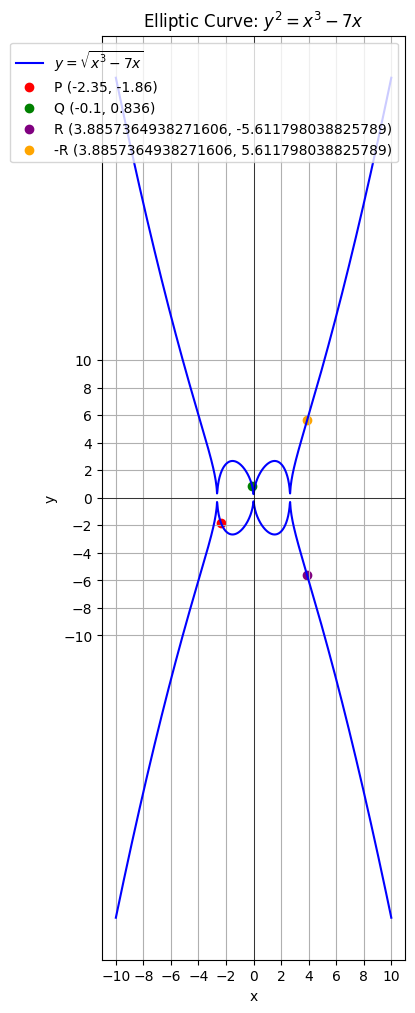

In [18]:
# The functions for calculating m, xr, and yr based on points P and Q, and then plotting the elliptic curve with these points
import numpy as np
import matplotlib.pyplot as plt

# Define the elliptic curve equation: y^2 = x^3 - 7x
def equation_elliptic_1(x):
    return x**3 - 7*x

# Function to calculate and check if the equation holds
def calculate_equation_bool(equation, point):
    xr, yr = point
    return yr**2 == equation(xr)

# Function to calculate slope (m) between two points on the curve
def calculate_m(P, Q):
    x1, y1 = P
    x2, y2 = Q
    if x1 != x2:
        return (y2 - y1) / (x2 - x1)
    else:
        return None  # Handle case where P and Q are the same point

# Function to calculate xr
def calculate_xr(m, P, Q):
    x1, y1 = P
    x2, y2 = Q
    return m**2 - x1 - x2

# Function to calculate yr
def calculate_yr(m, P, Q):
    x1, y1 = P
    xr = calculate_xr(m, P, Q)
    return m * (x1 - xr) - y1

# Define the points P and Q
P = (-2.35, -1.86)
Q = (-0.1, 0.836)

# Calculate m, xr, yr, and the point R
m = calculate_m(P, Q)
xr = calculate_xr(m, P, Q)
yr = calculate_yr(m, P, Q)
R = (xr, yr)

# Check if R satisfies the elliptic curve equation
result = calculate_equation_bool(equation_elliptic_1, R)
print(f"Does the equation hold for R: {result}")
print(f"R: {R}")

# Generate a set of x values for plotting the elliptic curve
x_vals = np.linspace(-10, 10, 1000)

# Calculate the corresponding y values
y_vals = np.sqrt(np.abs(equation_elliptic_1(x_vals)))  # y^2 = f(x) -> y = sqrt(f(x))

# Plot the elliptic curve and the points P, Q, R, and -R
plt.figure(figsize=(12, 12))
plt.plot(x_vals, y_vals, label=r'$y = \sqrt{x^3 - 7x}$', color='blue')  # upper half of the curve
plt.plot(x_vals, -y_vals, color='blue')  # lower half of the curve

# Plot the points P, Q, R, and -R
plt.scatter(*P, color='red', label=f'P {P}')
plt.scatter(*Q, color='green', label=f'Q {Q}')
plt.scatter(*R, color='purple', label=f'R {R}')
plt.scatter(R[0], -R[1], color='orange', label=f'-R ({R[0]}, {-R[1]})')

# Set equal aspect ratio to ensure x and y scales are the same
plt.gca().set_aspect('equal', adjustable='box')

# Add labels, title, and grid
plt.title("Elliptic Curve: $y^2 = x^3 - 7x$")
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.xticks(np.arange(-10, 11, 2))
plt.yticks(np.arange(-10, 11, 2))

plt.grid(True)
plt.legend()

# Show the plot
plt.show()

Does the equation hold for R: False
R: (3.8857364938271606, -5.611798038825789)


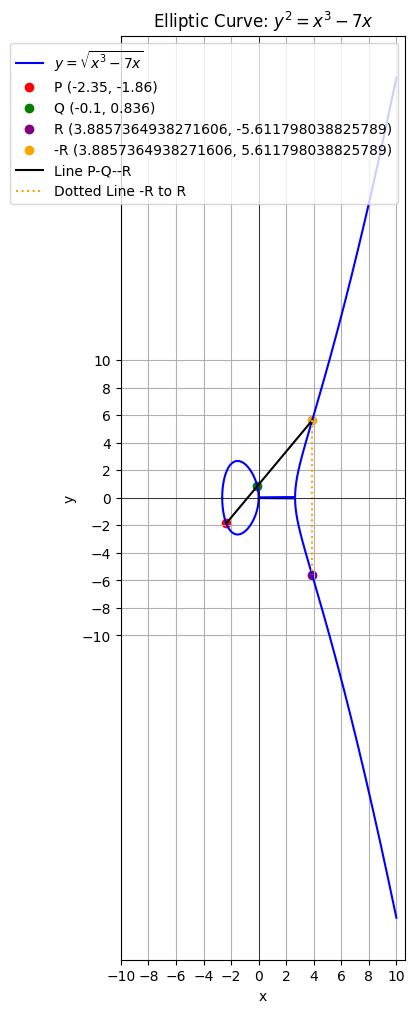

In [19]:
# The functions for calculating m, xr, and yr based on points P and Q, and then plotting the elliptic curve with these points
import numpy as np
import matplotlib.pyplot as plt

# Define the elliptic curve equation: y^2 = x^3 - 7x
def equation_elliptic_1(x):
    return x**3 - 7*x

# Function to calculate and check if the equation holds
def calculate_equation_bool(equation, point):
    xr, yr = point
    return yr**2 == equation(xr)

# Function to calculate slope (m) between two points on the curve
def calculate_m(P, Q):
    x1, y1 = P
    x2, y2 = Q
    if x1 != x2:
        return (y2 - y1) / (x2 - x1)
    else:
        return None  # Handle case where P and Q are the same point

# Function to calculate xr
def calculate_xr(m, P, Q):
    x1, y1 = P
    x2, y2 = Q
    return m**2 - x1 - x2

# Function to calculate yr
def calculate_yr(m, P, Q):
    x1, y1 = P
    xr = calculate_xr(m, P, Q)
    return m * (x1 - xr) - y1

# Define the points P and Q
P = (-2.35, -1.86)
Q = (-0.1, 0.836)

# Calculate m, xr, yr, and the point R
m = calculate_m(P, Q)
xr = calculate_xr(m, P, Q)
yr = calculate_yr(m, P, Q)
R = (xr, yr)

# Check if R satisfies the elliptic curve equation
result = calculate_equation_bool(equation_elliptic_1, R)
print(f"Does the equation hold for R: {result}")
print(f"R: {R}")

# Generate a set of x values for plotting the elliptic curve
x = np.linspace(-10, 10, 100000)

# Calculate the corresponding y values
y_squared = equation_elliptic_1(x)

# Mask values where y^2 is negative, as sqrt can't be applied to negative numbers in real numbers
valid_mask = y_squared >= 0
y_squared_valid = y_squared[valid_mask]
x_valid = x[valid_mask]

# Calculate y values (positive and negative branches) from valid y^2 values
y_positive = np.sqrt(y_squared_valid)
y_negative = -np.sqrt(y_squared_valid)

# Adjusting the plot to include lines from P to Q to -R, and a dotted line from -R to R
plt.figure(figsize=(12, 12))

# Plot the elliptic curve
plt.plot(x_valid, y_positive, label=r'$y = \sqrt{x^3 - 7x}$', color='blue')  # upper half of the curve
plt.plot(x_valid, y_negative, color='blue')  # lower half of the curve

# Plot the points P, Q, R, and -R
plt.scatter(*P, color='red', label=f'P {P}')
plt.scatter(*Q, color='green', label=f'Q {Q}')
plt.scatter(*R, color='purple', label=f'R {R}')
plt.scatter(R[0], -R[1], color='orange', label=f'-R ({R[0]}, {-R[1]})')

# Draw a line from P to Q to -R
plt.plot([P[0], Q[0], R[0]], [P[1], Q[1], -R[1]], color='black', label='Line P-Q--R')

# Draw a dotted line from -R to R
plt.plot([R[0], R[0]], [-R[1], R[1]], linestyle='dotted', color='orange', label='Dotted Line -R to R')

# Set equal aspect ratio to ensure x and y scales are the same
plt.gca().set_aspect('equal', adjustable='box')

# Add labels, title, and grid
plt.title("Elliptic Curve: $y^2 = x^3 - 7x$")
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.xticks(np.arange(-10, 11, 2))
plt.yticks(np.arange(-10, 11, 2))

plt.grid(True)
plt.legend()

# Show the plot
plt.show()


# Custom Equation Visualization

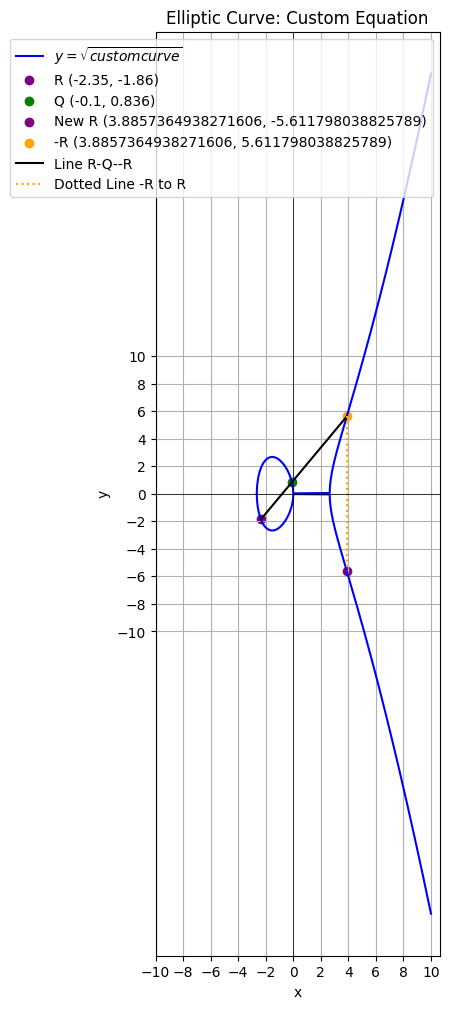

In [20]:
# Modified function to handle a custom elliptic curve equation

import numpy as np
import matplotlib.pyplot as plt

# Function to calculate slope (m) between two points on the curve
def calculate_m(R, Q):
    x1, y1 = R
    x2, y2 = Q
    if x1 != x2:
        return (y2 - y1) / (x2 - x1)
    else:
        return None  # Handle case where R and Q are the same point

# Function to calculate xr
def calculate_xr(m, R, Q):
    x1, y1 = R
    x2, y2 = Q
    return m**2 - x1 - x2

# Function to calculate yr
def calculate_yr(m, R, Q):
    x1, y1 = R
    xr = calculate_xr(m, R, Q)
    return m * (x1 - xr) - y1

# Function to plot the elliptic curve and given points, supporting a custom elliptic curve equation
def plot_elliptic_curve(R, Q, curve_equation):
    # Calculate m, xr, yr, and the new point
    m = calculate_m(R, Q)
    xr = calculate_xr(m, R, Q)
    yr = calculate_yr(m, R, Q)
    new_R = (xr, yr)

    # Generate a set of x values for plotting the elliptic curve
    x = np.linspace(-10, 10, 100000)

    # Calculate y^2 values from the custom elliptic curve equation
    y_squared = curve_equation(x)

    # Mask values where y^2 is negative, as sqrt can't be applied to negative numbers in real numbers
    valid_mask = y_squared >= 0
    y_squared_valid = y_squared[valid_mask]
    x_valid = x[valid_mask]

    # Calculate y values (positive and negative branches) from valid y^2 values
    y_positive = np.sqrt(y_squared_valid)
    y_negative = -np.sqrt(y_squared_valid)

    # Adjusting the plot to include lines from R to Q to -new_R, and a dotted line from -new_R to new_R
    plt.figure(figsize=(12, 12))

    # Plot the elliptic curve
    plt.plot(x_valid, y_positive, label=r'$y = \sqrt{custom curve}$', color='blue')  # upper half of the curve
    plt.plot(x_valid, y_negative, color='blue')  # lower half of the curve

    # Plot the points R, Q, new_R, and -new_R
    plt.scatter(*R, color='purple', label=f'R {R}')
    plt.scatter(*Q, color='green', label=f'Q {Q}')
    plt.scatter(*new_R, color='purple', label=f'New R {new_R}')
    plt.scatter(new_R[0], -new_R[1], color='orange', label=f'-R ({new_R[0]}, {-new_R[1]})')

    # Draw a line from R to Q to -new_R
    plt.plot([R[0], Q[0], new_R[0]], [R[1], Q[1], -new_R[1]], color='black', label='Line R-Q--R')

    # Draw a dotted line from -new_R to new_R
    plt.plot([new_R[0], new_R[0]], [-new_R[1], new_R[1]], linestyle='dotted', color='orange', label='Dotted Line -R to R')

    # Set equal aspect ratio to ensure x and y scales are the same
    plt.gca().set_aspect('equal', adjustable='box')

    # Add labels, title, and grid
    plt.title("Elliptic Curve: Custom Equation")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    plt.xticks(np.arange(-10, 11, 2))
    plt.yticks(np.arange(-10, 11, 2))

    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()

# Example usage with a custom elliptic curve equation:
R = (-2.35, -1.86)
Q = (-0.1, 0.836)

# Define a custom elliptic curve equation (can be changed as needed)
def custom_elliptic_curve(x):
    return x**3 - 7*x  # The original curve equation y^2 = x^3 - 7x

# Call the function to plot the curve and the points with the custom equation
plot_elliptic_curve(P, Q, custom_elliptic_curve)

### Point Addition

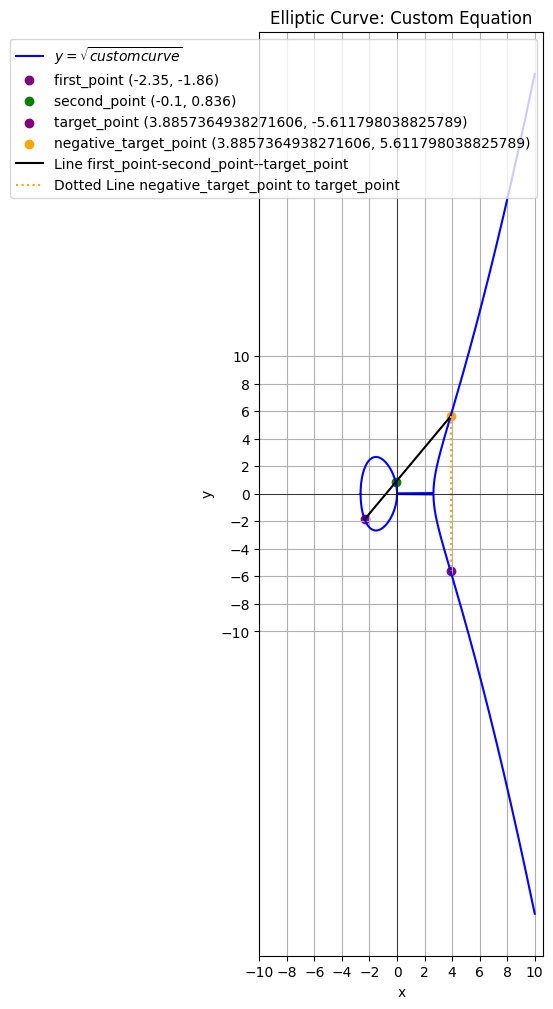

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate slope (m) between two points on the curve
def calculate_m(first_point, second_point):
    x1, y1 = first_point
    x2, y2 = second_point
    if x1 != x2:
        return (y2 - y1) / (x2 - x1)
    else:
        return None  # Handle case where first_point and second_point are the same point

# Function to calculate xr
def calculate_xr(m, first_point, second_point):
    x1, y1 = first_point
    x2, y2 = second_point
    return m**2 - x1 - x2

# Function to calculate yr
def calculate_yr(m, first_point, second_point):
    x1, y1 = first_point
    xr = calculate_xr(m, first_point, second_point)
    return m * (x1 - xr) - y1

# Function to plot the elliptic curve and given points, supporting a custom elliptic curve equation
def plot_elliptic_curve(first_point, second_point, curve_equation):
    # Calculate m, xr, yr, and the new point
    m = calculate_m(first_point, second_point)
    xr = calculate_xr(m, first_point, second_point)
    yr = calculate_yr(m, first_point, second_point)
    target_point = (xr, yr)

    # Generate a set of x values for plotting the elliptic curve
    x = np.linspace(-10, 10, 100000)

    # Calculate y^2 values from the custom elliptic curve equation
    y_squared = curve_equation(x)

    # Mask values where y^2 is negative, as sqrt can't be applied to negative numbers in real numbers
    valid_mask = y_squared >= 0
    y_squared_valid = y_squared[valid_mask]
    x_valid = x[valid_mask]

    # Calculate y values (positive and negative branches) from valid y^2 values
    y_positive = np.sqrt(y_squared_valid)
    y_negative = -np.sqrt(y_squared_valid)

    # Adjusting the plot to include lines from first_point to second_point to negative_target_point, and a dotted line from negative_target_point to target_point
    plt.figure(figsize=(12, 12))

    # Plot the elliptic curve
    plt.plot(x_valid, y_positive, label=r'$y = \sqrt{custom curve}$', color='blue')  # upper half of the curve
    plt.plot(x_valid, y_negative, color='blue')  # lower half of the curve

    # Plot the points first_point, second_point, target_point, and negative_target_point
    plt.scatter(*first_point, color='purple', label=f'first_point {first_point}')
    plt.scatter(*second_point, color='green', label=f'second_point {second_point}')
    plt.scatter(*target_point, color='purple', label=f'target_point {target_point}')
    plt.scatter(target_point[0], -target_point[1], color='orange', label=f'negative_target_point ({target_point[0]}, {-target_point[1]})')

    # Draw a line from first_point to second_point to negative_target_point
    plt.plot([first_point[0], second_point[0], target_point[0]], [first_point[1], second_point[1], -target_point[1]], color='black', label='Line first_point-second_point--target_point')

    # Draw a dotted line from negative_target_point to target_point
    plt.plot([target_point[0], target_point[0]], [-target_point[1], target_point[1]], linestyle='dotted', color='orange', label='Dotted Line negative_target_point to target_point')

    # Set equal aspect ratio to ensure x and y scales are the same
    plt.gca().set_aspect('equal', adjustable='box')

    # Add labels, title, and grid
    plt.title("Elliptic Curve: Custom Equation")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    plt.xticks(np.arange(-10, 11, 2))
    plt.yticks(np.arange(-10, 11, 2))

    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()

    return target_point

# Example usage with a custom elliptic curve equation:
first_point = (-2.35, -1.86)
second_point = (-0.1, 0.836)

# Define a custom elliptic curve equation (can be changed as needed)
def custom_elliptic_curve(x):
    return x**3 - 7*x  # The original curve equation y^2 = x^3 - 7x

# Call the function to plot the curve and the points with the custom equation
thrid_point = plot_elliptic_curve(first_point, second_point, custom_elliptic_curve)


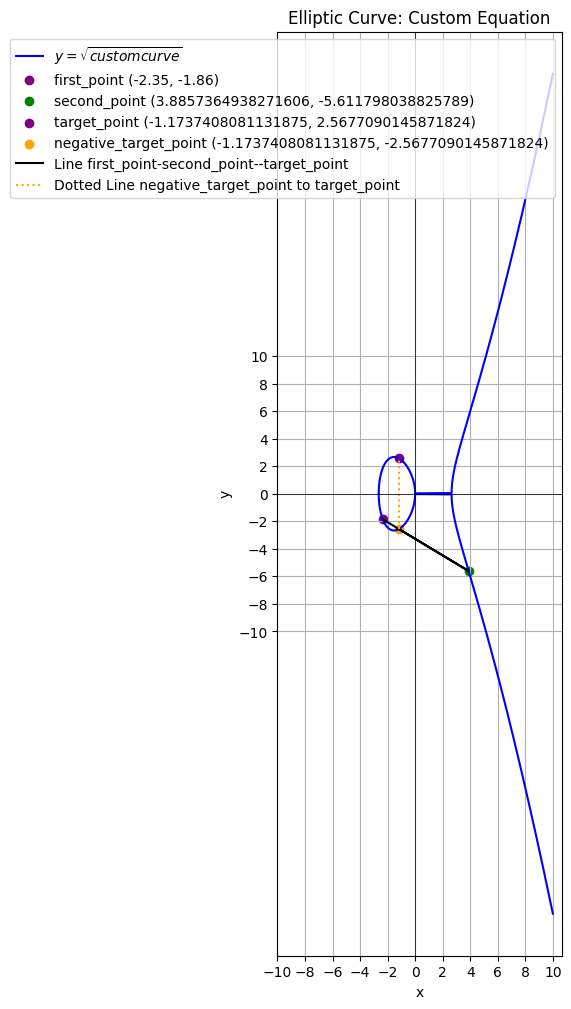

In [22]:
fourth_point = plot_elliptic_curve(first_point, thrid_point, custom_elliptic_curve)

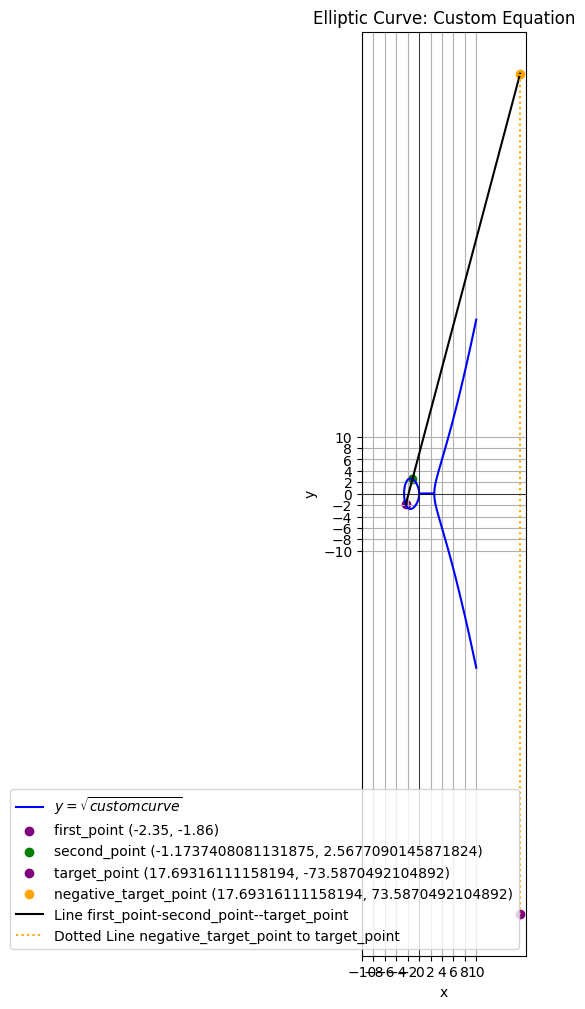

In [23]:
fifth_point = plot_elliptic_curve(first_point, fourth_point, custom_elliptic_curve)

## Finite

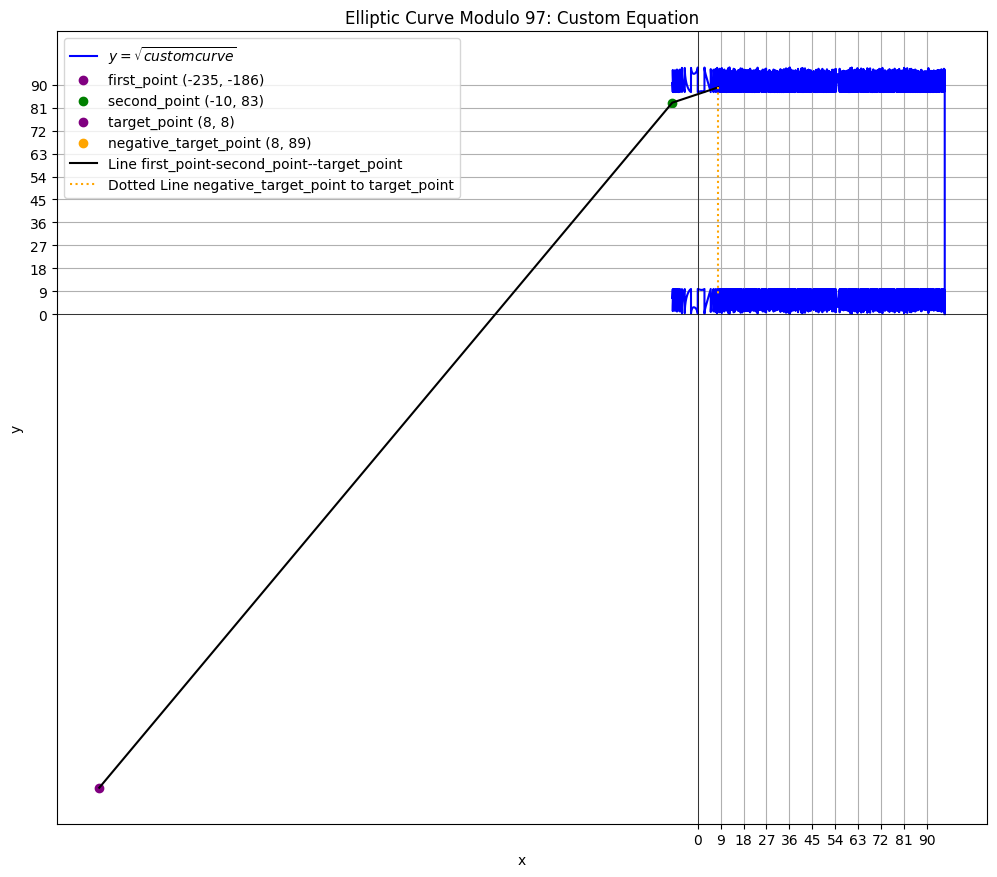

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Modular inverse function for division in finite fields
def mod_inverse(a, p):
    a = int(a)  # Ensure integer input
    return pow(a, p - 2, p)

# Function to calculate slope (m) between two points on the curve with mod
def calculate_m_mod(first_point, second_point, p):
    x1, y1 = first_point
    x2, y2 = second_point
    if x1 != x2:
        return ((y2 - y1) * mod_inverse(x2 - x1, p)) % p
    else:
        return None  # Handle case where first_point and second_point are the same point

# Function to calculate xr mod p
def calculate_xr_mod(m, first_point, second_point, p):
    x1, y1 = first_point
    x2, y2 = second_point
    return (m**2 - x1 - x2) % p

# Function to calculate yr mod p
def calculate_yr_mod(m, first_point, second_point, p):
    x1, y1 = first_point
    xr = calculate_xr_mod(m, first_point, second_point, p)
    return (m * (x1 - xr) - y1) % p

# Function to plot the elliptic curve and given points with mod p
def plot_elliptic_curve_mod(first_point, second_point, curve_equation, p):
    # Convert floating-point coordinates to integers for modular arithmetic by scaling them
    scale = 100  # Define a scaling factor to convert floats to integers
    first_point = tuple(map(lambda x: int(x * scale), first_point))
    second_point = tuple(map(lambda x: int(x * scale), second_point))

    # Calculate m, xr, yr, and the new point with modular arithmetic
    m = calculate_m_mod(first_point, second_point, p)
    xr = calculate_xr_mod(m, first_point, second_point, p)
    yr = calculate_yr_mod(m, first_point, second_point, p)
    target_point = (xr, yr)

    # Generate a set of x values for plotting the elliptic curve
    x = np.linspace(-10, p, 10000)

    # Calculate y^2 values from the custom elliptic curve equation mod p
    y_squared = curve_equation(x) % p

    # Mask values where y^2 is negative, as sqrt can't be applied to negative numbers in real numbers
    valid_mask = y_squared >= 0
    y_squared_valid = y_squared[valid_mask]
    x_valid = x[valid_mask]

    # Calculate y values (positive and negative branches) from valid y^2 values
    y_positive = np.sqrt(y_squared_valid) % p
    y_negative = -np.sqrt(y_squared_valid) % p

    # Adjusting the plot to include lines from first_point to second_point to negative_target_point, and a dotted line from negative_target_point to target_point
    plt.figure(figsize=(12, 12))

    # Plot the elliptic curve
    plt.plot(x_valid, y_positive, label=r'$y = \sqrt{custom curve}$', color='blue')  # upper half of the curve
    plt.plot(x_valid, y_negative, color='blue')  # lower half of the curve

    # Plot the points first_point, second_point, target_point, and negative_target_point
    plt.scatter(*first_point, color='purple', label=f'first_point {first_point}')
    plt.scatter(*second_point, color='green', label=f'second_point {second_point}')
    plt.scatter(*target_point, color='purple', label=f'target_point {target_point}')
    plt.scatter(target_point[0], (-target_point[1]) % p, color='orange', label=f'negative_target_point ({target_point[0]}, {(-target_point[1]) % p})')

    # Draw a line from first_point to second_point to negative_target_point
    plt.plot([first_point[0], second_point[0], target_point[0]], [first_point[1], second_point[1], (-target_point[1]) % p], color='black', label='Line first_point-second_point--target_point')

    # Draw a dotted line from negative_target_point to target_point
    plt.plot([target_point[0], target_point[0]], [(-target_point[1]) % p, target_point[1]], linestyle='dotted', color='orange', label='Dotted Line negative_target_point to target_point')

    # Set equal aspect ratio to ensure x and y scales are the same
    plt.gca().set_aspect('equal', adjustable='box')

    # Add labels, title, and grid
    plt.title(f"Elliptic Curve Modulo {p}: Custom Equation")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    plt.xticks(np.arange(0, p+1, p // 10))
    plt.yticks(np.arange(0, p+1, p // 10))

    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()

    return target_point

# Example usage with a custom elliptic curve equation and modulo p
first_point = (-2.35, -1.86)
second_point = (-0.1, 0.836)
p = 97  # Example prime number for modulo

# Define a custom elliptic curve equation (can be changed as needed)
def custom_elliptic_curve(x):
    return x**3 - 7*x  # The original curve equation y^2 = x^3 - 7x

# Call the function to plot the curve and the points with the custom equation mod p
third_point = plot_elliptic_curve_mod(first_point, second_point, custom_elliptic_curve, p)


### Point Doubling

Does the equation hold for R: False
R: (44.836652810295995, 300.8039355125406)


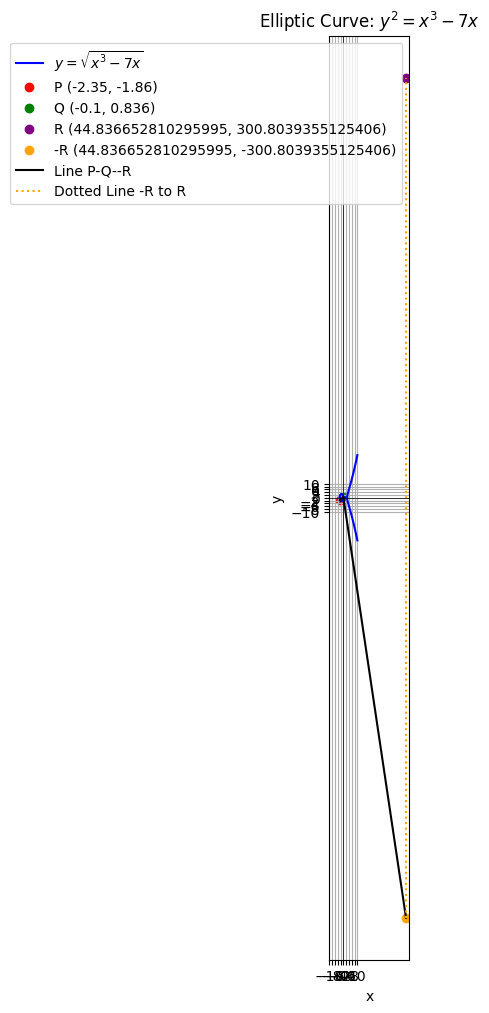

In [29]:
# The functions for calculating m, xr, and yr based on points P and Q, and then plotting the elliptic curve with these points
import numpy as np
import matplotlib.pyplot as plt

# Define the elliptic curve equation: y^2 = x^3 - 7x
def equation_elliptic_1(x):
    return x**3 - 7*x

# Function to calculate and check if the equation holds
def calculate_equation_bool(equation, point):
    xr, yr = point
    return yr**2 == equation(xr)

# Function to calculate slope (m) between two points on the curve
def calculate_m(P, a):
    x1, y1 = P

    m = (3 * x1**2 + a) / (2 * y1)
    return m

# Function to calculate xr
def calculate_xr(m, P):
    x1, y1 = P

    xr = m**2 - (2 * x1)
    return xr

# Function to calculate yr
def calculate_yr(m, P, xr):
    x1, y1 = P

    yr = m * (x1 - xr) - y1
    return yr

# Define the points P and Q
P = (-2.35, -1.86)
# Q = (-0.1, 0.836)

# Calculate m, xr, yr, and the point R
m = calculate_m(P, 7)
xr = calculate_xr(m, P)
yr = calculate_yr(m, P, xr)
R = (xr, yr)

# Check if R satisfies the elliptic curve equation
result = calculate_equation_bool(equation_elliptic_1, R)
print(f"Does the equation hold for R: {result}")
print(f"R: {R}")

# Generate a set of x values for plotting the elliptic curve
x = np.linspace(-10, 10, 100000)

# Calculate the corresponding y values
y_squared = equation_elliptic_1(x)

# Mask values where y^2 is negative, as sqrt can't be applied to negative numbers in real numbers
valid_mask = y_squared >= 0
y_squared_valid = y_squared[valid_mask]
x_valid = x[valid_mask]

# Calculate y values (positive and negative branches) from valid y^2 values
y_positive = np.sqrt(y_squared_valid)
y_negative = -np.sqrt(y_squared_valid)

# Adjusting the plot to include lines from P to Q to -R, and a dotted line from -R to R
plt.figure(figsize=(12, 12))

# Plot the elliptic curve
plt.plot(x_valid, y_positive, label=r'$y = \sqrt{x^3 - 7x}$', color='blue')  # upper half of the curve
plt.plot(x_valid, y_negative, color='blue')  # lower half of the curve

# Plot the points P, Q, R, and -R
plt.scatter(*P, color='red', label=f'P {P}')
plt.scatter(*Q, color='green', label=f'Q {Q}')
plt.scatter(*R, color='purple', label=f'R {R}')
plt.scatter(R[0], -R[1], color='orange', label=f'-R ({R[0]}, {-R[1]})')

# Draw a line from P to Q to -R
plt.plot([P[0], Q[0], R[0]], [P[1], Q[1], -R[1]], color='black', label='Line P-Q--R')

# Draw a dotted line from -R to R
plt.plot([R[0], R[0]], [-R[1], R[1]], linestyle='dotted', color='orange', label='Dotted Line -R to R')

# Set equal aspect ratio to ensure x and y scales are the same
plt.gca().set_aspect('equal', adjustable='box')

# Add labels, title, and grid
plt.title("Elliptic Curve: $y^2 = x^3 - 7x$")
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.xticks(np.arange(-10, 11, 2))
plt.yticks(np.arange(-10, 11, 2))

plt.grid(True)
plt.legend()

# Show the plot
plt.show()

Does the equation hold for R: False
R: (17.878202479338846, -76.42616951540198)


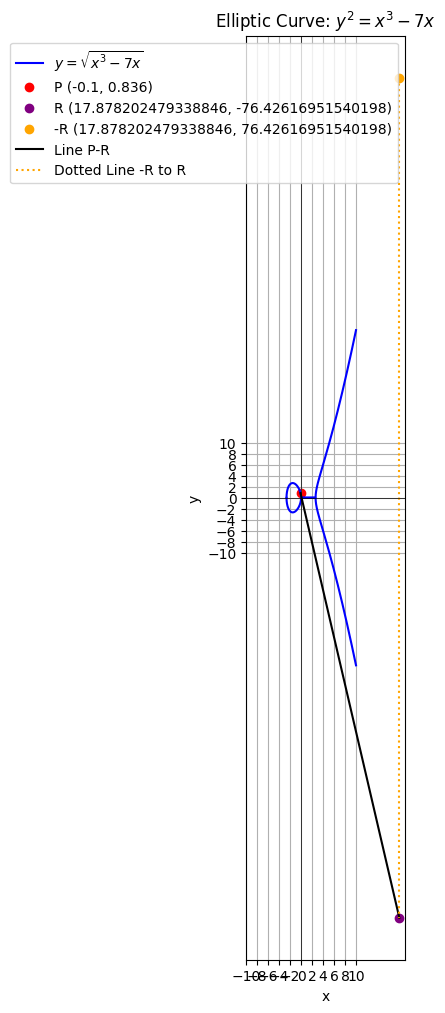

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define the elliptic curve equation: y^2 = x^3 - 7x
def equation_elliptic_1(x):
    return x**3 - 7*x

# Function to calculate and check if the equation holds
def calculate_equation_bool(equation, point):
    xr, yr = point
    return yr**2 == equation(xr)

# Function to calculate slope (m) for point doubling on the curve
def calculate_m_double(P, a):
    x1, y1 = P
    # Handle division by zero when y1 == 0
    if y1 == 0:
        return float('inf')  # Return infinity to represent the point at infinity (undefined slope)

    m = (3 * x1**2 + a) / (2 * y1)
    return m

# Function to calculate xr
def calculate_xr(m, P):
    x1, y1 = P
    xr = m**2 - (2 * x1)
    return xr

# Function to calculate yr
def calculate_yr(m, P, xr):
    x1, y1 = P
    yr = m * (x1 - xr) - y1
    return yr

# Define the point P
P = (-0.1, 0.836)

# Calculate m, xr, yr, and the point R using point doubling
m = calculate_m_double(P, 7)
if m == float('inf'):
    print("Slope is undefined (point at infinity).")
else:
    xr = calculate_xr(m, P)
    yr = calculate_yr(m, P, xr)
    R = (xr, yr)

    # Check if R satisfies the elliptic curve equation
    result = calculate_equation_bool(equation_elliptic_1, R)
    print(f"Does the equation hold for R: {result}")
    print(f"R: {R}")

    # Generate a set of x values for plotting the elliptic curve
    x = np.linspace(-10, 10, 100000)

    # Calculate the corresponding y values
    y_squared = equation_elliptic_1(x)

    # Mask values where y^2 is negative, as sqrt can't be applied to negative numbers in real numbers
    valid_mask = y_squared >= 0
    y_squared_valid = y_squared[valid_mask]
    x_valid = x[valid_mask]

    # Calculate y values (positive and negative branches) from valid y^2 values
    y_positive = np.sqrt(y_squared_valid)
    y_negative = -np.sqrt(y_squared_valid)

    # Adjusting the plot to include lines from P to R and -R
    plt.figure(figsize=(12, 12))

    # Plot the elliptic curve
    plt.plot(x_valid, y_positive, label=r'$y = \sqrt{x^3 - 7x}$', color='blue')  # upper half of the curve
    plt.plot(x_valid, y_negative, color='blue')  # lower half of the curve

    # Plot the points P, R, and -R
    plt.scatter(*P, color='red', label=f'P {P}')
    plt.scatter(*R, color='purple', label=f'R {R}')
    plt.scatter(R[0], -R[1], color='orange', label=f'-R ({R[0]}, {-R[1]})')

    # Draw a line from P to R to -R
    plt.plot([P[0], R[0]], [P[1], R[1]], color='black', label='Line P-R')
    plt.plot([R[0], R[0]], [-R[1], R[1]], linestyle='dotted', color='orange', label='Dotted Line -R to R')

    # Set equal aspect ratio to ensure x and y scales are the same
    plt.gca().set_aspect('equal', adjustable='box')

    # Add labels, title, and grid
    plt.title("Elliptic Curve: $y^2 = x^3 - 7x$")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    plt.xticks(np.arange(-10, 11, 2))
    plt.yticks(np.arange(-10, 11, 2))

    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()


In [1]:
P = (2, 2.65)



Does the equation hold for R: False
R: (4.0099679601281615, -8.338588566400457)


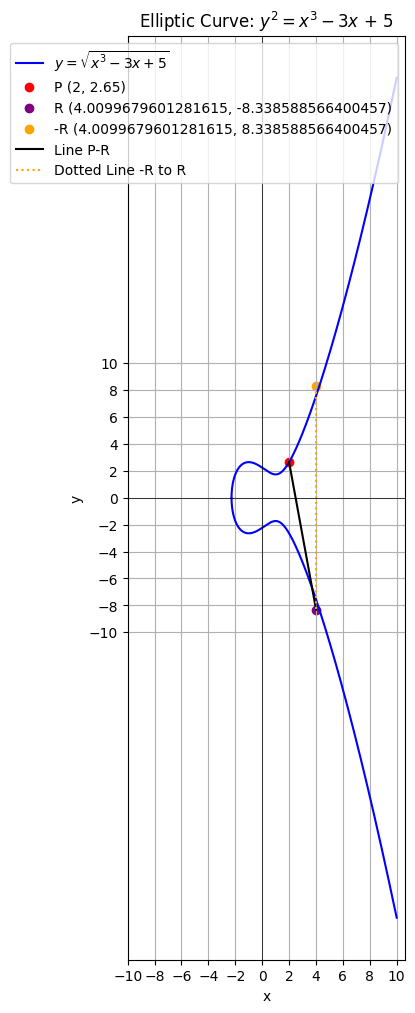

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the elliptic curve equation: y^2 = x^3 - 7x
def equation_elliptic_1(x, a, b):
    return x**3 - a*x + b

# Function to calculate and check if the equation holds
def calculate_equation_bool(equation, point, a, b):
    xr, yr = point
    return yr**2 == equation(xr, a, b)

# Function to calculate slope (m) for point doubling on the curve
def calculate_m_double(P, a):
    x1, y1 = P
    # Handle division by zero when y1 == 0
    if y1 == 0:
        return float('inf')  # Return infinity to represent the point at infinity (undefined slope)

    m = (3 * x1**2 + a) / (2 * y1)
    return m

# Function to calculate xr
def calculate_xr(m, P):
    x1, y1 = P
    xr = m**2 - (2 * x1)
    return xr

# Function to calculate yr
def calculate_yr(m, P, xr):
    x1, y1 = P
    yr = m * (x1 - xr) - y1
    return yr

a = 3
b = 5
# Define the point P
P = (2, 2.65)

# Calculate m, xr, yr, and the point R using point doubling
m = calculate_m_double(P, a)
if m == float('inf'):
    print("Slope is undefined (point at infinity).")
else:
    xr = calculate_xr(m, P)
    yr = calculate_yr(m, P, xr)
    R = (xr, yr)

    # Check if R satisfies the elliptic curve equation
    result = calculate_equation_bool(equation_elliptic_1, R, a, b)
    print(f"Does the equation hold for R: {result}")
    print(f"R: {R}")

    # Generate a set of x values for plotting the elliptic curve
    x = np.linspace(-10, 10, 100000)

    # Calculate the corresponding y values
    y_squared = equation_elliptic_1(x, a, b)

    # Mask values where y^2 is negative, as sqrt can't be applied to negative numbers in real numbers
    valid_mask = y_squared >= 0
    y_squared_valid = y_squared[valid_mask]
    x_valid = x[valid_mask]

    # Calculate y values (positive and negative branches) from valid y^2 values
    y_positive = np.sqrt(y_squared_valid)
    y_negative = -np.sqrt(y_squared_valid)

    # Adjusting the plot to include lines from P to R and -R
    plt.figure(figsize=(12, 12))

    # Plot the elliptic curve
    plt.plot(x_valid, y_positive, label=r'$y = \sqrt{x^3 - 3x + 5}$', color='blue')  # upper half of the curve
    plt.plot(x_valid, y_negative, color='blue')  # lower half of the curve

    # Plot the points P, R, and -R
    plt.scatter(*P, color='red', label=f'P {P}')
    plt.scatter(*R, color='purple', label=f'R {R}')
    plt.scatter(R[0], -R[1], color='orange', label=f'-R ({R[0]}, {-R[1]})')

    # Draw a line from P to R to -R
    plt.plot([P[0], R[0]], [P[1], R[1]], color='black', label='Line P-R')
    plt.plot([R[0], R[0]], [-R[1], R[1]], linestyle='dotted', color='orange', label='Dotted Line -R to R')

    # Set equal aspect ratio to ensure x and y scales are the same
    plt.gca().set_aspect('equal', adjustable='box')

    # Add labels, title, and grid
    plt.title("Elliptic Curve: $y^2 = x^3 - 3x$ + 5")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    plt.xticks(np.arange(-10, 11, 2))
    plt.yticks(np.arange(-10, 11, 2))

    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()


Does the equation hold for R: False
R: (4.0099679601281615, -8.338588566400457)


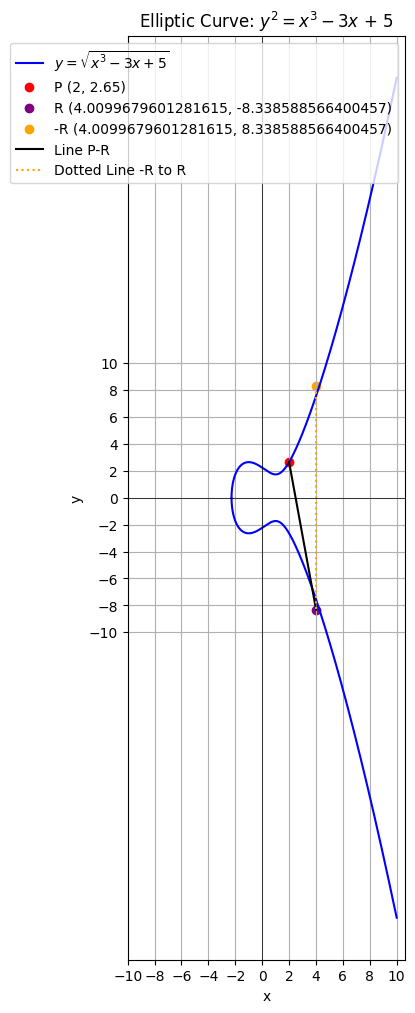

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the elliptic curve equation: y^2 = x^3 - 7x
def equation_elliptic_1(x, a, b):
    return x**3 - a*x + b

# Function to calculate and check if the equation holds
def calculate_equation_bool(equation, point, a, b):
    xr, yr = point
    return yr**2 == equation(xr, a, b)

# Function to calculate slope (m) for point doubling on the curve
def calculate_m_double(P, a):
    x1, y1 = P
    # Handle division by zero when y1 == 0
    if y1 == 0:
        return float('inf')  # Return infinity to represent the point at infinity (undefined slope)

    m = (3 * (x1**2) + a) / (2 * y1)
    return m

# Function to calculate xr
def calculate_xr(m, P):
    x1, y1 = P
    xr = m**2 - (2 * x1)
    return xr

# Function to calculate yr
def calculate_yr(m, P, xr):
    x1, y1 = P
    yr = m * (x1 - xr) - y1
    return yr

a = 3
b = 5
# Define the point P
P = (2, 2.65)

# Calculate m, xr, yr, and the point R using point doubling
m = calculate_m_double(P, a)
if m == float('inf'):
    print("Slope is undefined (point at infinity).")
else:
    xr = calculate_xr(m, P)
    yr = calculate_yr(m, P, xr)
    R = (xr, yr)

    # Check if R satisfies the elliptic curve equation
    result = calculate_equation_bool(equation_elliptic_1, R, a, b)
    print(f"Does the equation hold for R: {result}")
    print(f"R: {R}")

    # Generate a set of x values for plotting the elliptic curve
    x = np.linspace(-10, 10, 100000)

    # Calculate the corresponding y values
    y_squared = equation_elliptic_1(x, a, b)

    # Mask values where y^2 is negative, as sqrt can't be applied to negative numbers in real numbers
    valid_mask = y_squared >= 0
    y_squared_valid = y_squared[valid_mask]
    x_valid = x[valid_mask]

    # Calculate y values (positive and negative branches) from valid y^2 values
    y_positive = np.sqrt(y_squared_valid)
    y_negative = -np.sqrt(y_squared_valid)

    # Adjusting the plot to include lines from P to R and -R
    plt.figure(figsize=(12, 12))

    # Plot the elliptic curve
    plt.plot(x_valid, y_positive, label=r'$y = \sqrt{x^3 - 3x + 5}$', color='blue')  # upper half of the curve
    plt.plot(x_valid, y_negative, color='blue')  # lower half of the curve

    # Plot the points P, R, and -R
    plt.scatter(*P, color='red', label=f'P {P}')
    plt.scatter(*R, color='purple', label=f'R {R}')
    plt.scatter(R[0], -R[1], color='orange', label=f'-R ({R[0]}, {-R[1]})')

    # Draw a line from P to R to -R
    plt.plot([P[0], R[0]], [P[1], R[1]], color='black', label='Line P-R')
    plt.plot([R[0], R[0]], [-R[1], R[1]], linestyle='dotted', color='orange', label='Dotted Line -R to R')

    # Set equal aspect ratio to ensure x and y scales are the same
    plt.gca().set_aspect('equal', adjustable='box')

    # Add labels, title, and grid
    plt.title("Elliptic Curve: $y^2 = x^3 - 3x$ + 5")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    plt.xticks(np.arange(-10, 11, 2))
    plt.yticks(np.arange(-10, 11, 2))

    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()


Does the equation hold for R: False
R: (4.0099679601281615, -8.338588566400457)


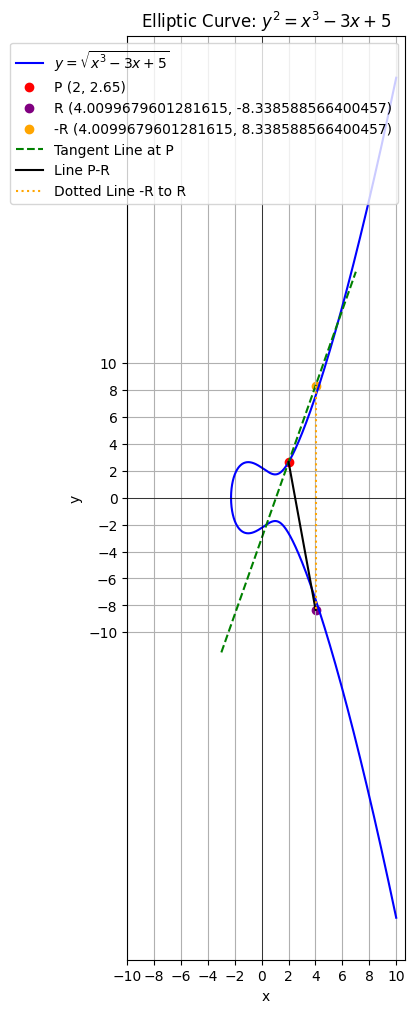

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the elliptic curve equation: y^2 = x^3 - a*x + b
def equation_elliptic_1(x, a, b):
    return x**3 - a*x + b

# Function to calculate and check if the equation holds
def calculate_equation_bool(equation, point, a, b):
    xr, yr = point
    return yr**2 == equation(xr, a, b)

# Function to calculate slope (m) for point doubling on the curve
def calculate_m_double(P, a):
    x1, y1 = P
    # Handle division by zero when y1 == 0
    if y1 == 0:
        return float('inf')  # Return infinity to represent the point at infinity (undefined slope)

    m = (3 * (x1**2) + a) / (2 * y1)
    return m

# Function to calculate xr
def calculate_xr(m, P):
    x1, y1 = P
    xr = m**2 - (2 * x1)
    return xr

# Function to calculate yr
def calculate_yr(m, P, xr):
    x1, y1 = P
    yr = m * (x1 - xr) - y1
    return yr

# Function to calculate the y value of the tangent line at x
def calculate_tangent_y(m, P, x):
    x1, y1 = P
    return m * (x - x1) + y1

a = 3
b = 5
# Define the point P
P = (2, 2.65)

# Calculate m, xr, yr, and the point R using point doubling
m = calculate_m_double(P, a)
if m == float('inf'):
    print("Slope is undefined (point at infinity).")
else:
    xr = calculate_xr(m, P)
    yr = calculate_yr(m, P, xr)
    R = (xr, yr)

    # Check if R satisfies the elliptic curve equation
    result = calculate_equation_bool(equation_elliptic_1, R, a, b)
    print(f"Does the equation hold for R: {result}")
    print(f"R: {R}")

    # Generate a set of x values for plotting the elliptic curve
    x = np.linspace(-10, 10, 100000)

    # Calculate the corresponding y values
    y_squared = equation_elliptic_1(x, a, b)

    # Mask values where y^2 is negative, as sqrt can't be applied to negative numbers in real numbers
    valid_mask = y_squared >= 0
    y_squared_valid = y_squared[valid_mask]
    x_valid = x[valid_mask]

    # Calculate y values (positive and negative branches) from valid y^2 values
    y_positive = np.sqrt(y_squared_valid)
    y_negative = -np.sqrt(y_squared_valid)

    # Calculate tangent line values
    tangent_x = np.linspace(P[0] - 5, P[0] + 5, 500)
    tangent_y = calculate_tangent_y(m, P, tangent_x)

    # Adjusting the plot to include lines from P to R and the tangent line
    plt.figure(figsize=(12, 12))

    # Plot the elliptic curve
    plt.plot(x_valid, y_positive, label=r'$y = \sqrt{x^3 - 3x + 5}$', color='blue')  # upper half of the curve
    plt.plot(x_valid, y_negative, color='blue')  # lower half of the curve

    # Plot the points P, R, and -R
    plt.scatter(*P, color='red', label=f'P {P}')
    plt.scatter(*R, color='purple', label=f'R {R}')
    plt.scatter(R[0], -R[1], color='orange', label=f'-R ({R[0]}, {-R[1]})')

    # Plot the tangent line at point P
    plt.plot(tangent_x, tangent_y, color='green', linestyle='--', label='Tangent Line at P')

    # Draw a line from P to R to -R
    plt.plot([P[0], R[0]], [P[1], R[1]], color='black', label='Line P-R')
    plt.plot([R[0], R[0]], [-R[1], R[1]], linestyle='dotted', color='orange', label='Dotted Line -R to R')

    # Set equal aspect ratio to ensure x and y scales are the same
    plt.gca().set_aspect('equal', adjustable='box')

    # Add labels, title, and grid
    plt.title("Elliptic Curve: $y^2 = x^3 - 3x + 5$")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    plt.xticks(np.arange(-10, 11, 2))
    plt.yticks(np.arange(-10, 11, 2))

    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()


## Elliptic Curve Galois Field

Does the equation hold for R: False
R: (7.534353862584551, -21.44591877858904)


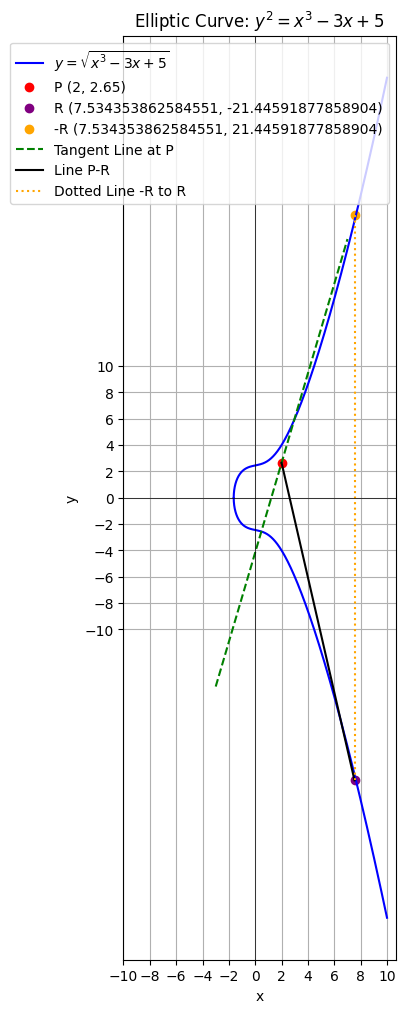

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the elliptic curve equation: y^2 = x^3 - a*x + b
def equation_elliptic_1(x, a, b, p):
    return x**3 + x + a % p

# Function to calculate and check if the equation holds
def calculate_equation_bool(equation, point, a, b, p):
    xr, yr = point
    return yr**2 == equation(xr, a, b, p)

# Function to calculate slope (m) for point doubling on the curve
def calculate_m_double(P, a):
    x1, y1 = P
    # Handle division by zero when y1 == 0
    if y1 == 0:
        return float('inf')  # Return infinity to represent the point at infinity (undefined slope)

    m = (3 * (x1**2) + a) / (2 * y1)
    return m

# Function to calculate xr
def calculate_xr(m, P):
    x1, y1 = P
    xr = m**2 - (2 * x1)
    return xr

# Function to calculate yr
def calculate_yr(m, P, xr):
    x1, y1 = P
    yr = m * (x1 - xr) - y1
    return yr

# Function to calculate the y value of the tangent line at x
def calculate_tangent_y(m, P, x):
    x1, y1 = P
    return m * (x - x1) + y1

a = 6
b = 5

p = 11
# Define the point P
P = (2, 2.65)

# Calculate m, xr, yr, and the point R using point doubling
m = calculate_m_double(P, a)
if m == float('inf'):
    print("Slope is undefined (point at infinity).")
else:
    xr = calculate_xr(m, P)
    yr = calculate_yr(m, P, xr)
    R = (xr, yr)

    # Check if R satisfies the elliptic curve equation
    result = calculate_equation_bool(equation_elliptic_1, R, a, b, p)
    print(f"Does the equation hold for R: {result}")
    print(f"R: {R}")

    # Generate a set of x values for plotting the elliptic curve
    x = np.linspace(-10, 10, 100000)

    # Calculate the corresponding y values
    y_squared = equation_elliptic_1(x, a, b, p)

    # Mask values where y^2 is negative, as sqrt can't be applied to negative numbers in real numbers
    valid_mask = y_squared >= 0
    y_squared_valid = y_squared[valid_mask]
    x_valid = x[valid_mask]

    # Calculate y values (positive and negative branches) from valid y^2 values
    y_positive = np.sqrt(y_squared_valid)
    y_negative = -np.sqrt(y_squared_valid)

    # Calculate tangent line values
    tangent_x = np.linspace(P[0] - 5, P[0] + 5, 500)
    tangent_y = calculate_tangent_y(m, P, tangent_x)

    # Adjusting the plot to include lines from P to R and the tangent line
    plt.figure(figsize=(12, 12))

    # Plot the elliptic curve
    plt.plot(x_valid, y_positive, label=r'$y = \sqrt{x^3 - 3x + 5}$', color='blue')  # upper half of the curve
    plt.plot(x_valid, y_negative, color='blue')  # lower half of the curve

    # Plot the points P, R, and -R
    plt.scatter(*P, color='red', label=f'P {P}')
    plt.scatter(*R, color='purple', label=f'R {R}')
    plt.scatter(R[0], -R[1], color='orange', label=f'-R ({R[0]}, {-R[1]})')

    # Plot the tangent line at point P
    plt.plot(tangent_x, tangent_y, color='green', linestyle='--', label='Tangent Line at P')

    # Draw a line from P to R to -R
    plt.plot([P[0], R[0]], [P[1], R[1]], color='black', label='Line P-R')
    plt.plot([R[0], R[0]], [-R[1], R[1]], linestyle='dotted', color='orange', label='Dotted Line -R to R')

    # Set equal aspect ratio to ensure x and y scales are the same
    plt.gca().set_aspect('equal', adjustable='box')

    # Add labels, title, and grid
    plt.title("Elliptic Curve: $y^2 = x^3 - 3x + 5$")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    plt.xticks(np.arange(-10, 11, 2))
    plt.yticks(np.arange(-10, 11, 2))

    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()


In [ ]:
# y^3 = x^2 + a*x + b mod p
# where p was prime number



Does the equation hold for R: False
R: (7.534353862584551, -21.44591877858904)


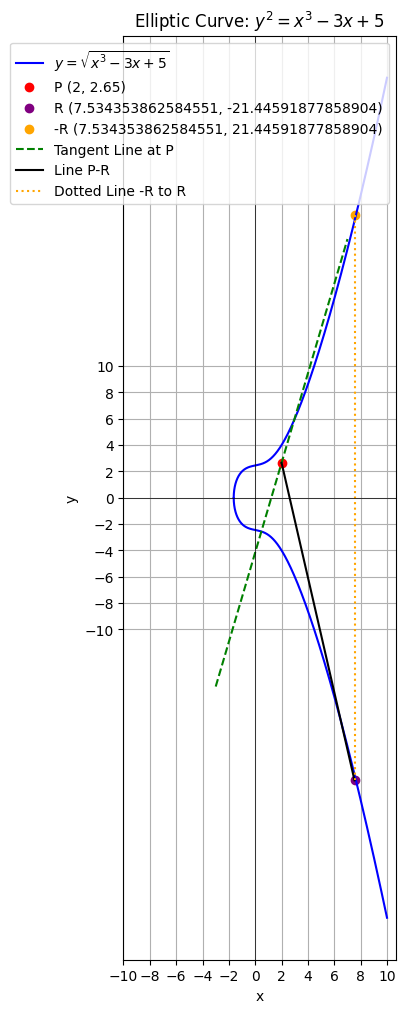

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the elliptic curve equation: y^2 = x^3 - a*x + b
def equation_elliptic_1(x, a, b):
    return x**3 + x + a

# Function to calculate and check if the equation holds
def calculate_equation_bool(equation, point, a, b):
    xr, yr = point
    return yr**2 == equation(xr, a, b)

# Function to calculate slope (m) for point doubling on the curve
def calculate_m_double(P, a):
    x1, y1 = P
    # Handle division by zero when y1 == 0
    if y1 == 0:
        return float('inf')  # Return infinity to represent the point at infinity (undefined slope)

    m = (3 * (x1**2) + a) / (2 * y1)
    return m

# Function to calculate xr
def calculate_xr(m, P):
    x1, y1 = P
    xr = m**2 - (2 * x1)
    return xr

# Function to calculate yr
def calculate_yr(m, P, xr):
    x1, y1 = P
    yr = m * (x1 - xr) - y1
    return yr

# Function to calculate the y value of the tangent line at x
def calculate_tangent_y(m, P, x):
    x1, y1 = P
    return m * (x - x1) + y1

a = 6
b = 5
# Define the point P
P = (2, 2.65)

# Calculate m, xr, yr, and the point R using point doubling
m = calculate_m_double(P, a)
if m == float('inf'):
    print("Slope is undefined (point at infinity).")
else:
    xr = calculate_xr(m, P)
    yr = calculate_yr(m, P, xr)
    R = (xr, yr)

    # Check if R satisfies the elliptic curve equation
    result = calculate_equation_bool(equation_elliptic_1, R, a, b)
    print(f"Does the equation hold for R: {result}")
    print(f"R: {R}")

    # Generate a set of x values for plotting the elliptic curve
    x = np.linspace(-10, 10, 100000)

    # Calculate the corresponding y values
    y_squared = equation_elliptic_1(x, a, b)

    # Mask values where y^2 is negative, as sqrt can't be applied to negative numbers in real numbers
    valid_mask = y_squared >= 0
    y_squared_valid = y_squared[valid_mask]
    x_valid = x[valid_mask]

    # Calculate y values (positive and negative branches) from valid y^2 values
    y_positive = np.sqrt(y_squared_valid)
    y_negative = -np.sqrt(y_squared_valid)

    # Calculate tangent line values
    tangent_x = np.linspace(P[0] - 5, P[0] + 5, 500)
    tangent_y = calculate_tangent_y(m, P, tangent_x)

    # Adjusting the plot to include lines from P to R and the tangent line
    plt.figure(figsize=(12, 12))

    # Plot the elliptic curve
    plt.plot(x_valid, y_positive, label=r'$y = \sqrt{x^3 - 3x + 5}$', color='blue')  # upper half of the curve
    plt.plot(x_valid, y_negative, color='blue')  # lower half of the curve

    # Plot the points P, R, and -R
    plt.scatter(*P, color='red', label=f'P {P}')
    plt.scatter(*R, color='purple', label=f'R {R}')
    plt.scatter(R[0], -R[1], color='orange', label=f'-R ({R[0]}, {-R[1]})')

    # Plot the tangent line at point P
    plt.plot(tangent_x, tangent_y, color='green', linestyle='--', label='Tangent Line at P')

    # Draw a line from P to R to -R
    plt.plot([P[0], R[0]], [P[1], R[1]], color='black', label='Line P-R')
    plt.plot([R[0], R[0]], [-R[1], R[1]], linestyle='dotted', color='orange', label='Dotted Line -R to R')

    # Set equal aspect ratio to ensure x and y scales are the same
    plt.gca().set_aspect('equal', adjustable='box')

    # Add labels, title, and grid
    plt.title("Elliptic Curve: $y^2 = x^3 - 3x + 5$")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    plt.xticks(np.arange(-10, 11, 2))
    plt.yticks(np.arange(-10, 11, 2))

    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()


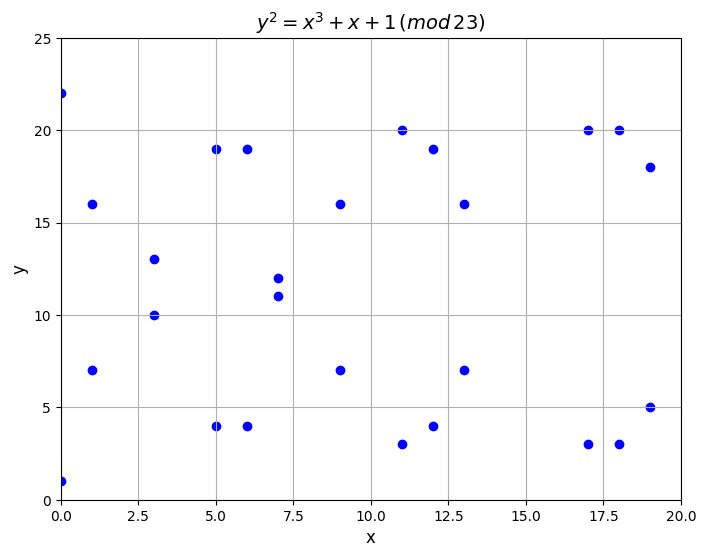

In [19]:
import matplotlib.pyplot as plt

# List of points from the elliptic curve in the image
points = [(0,1), (0,22), (1,7), (1,16), (3,10), (3,13), (5,4), (5,19),
          (6,4), (6,19), (7,11), (7,12), (9,7), (9,16), (11,3), (11,20),
          (12,4), (12,19), (13,7), (13,16), (17,3), (17,20), (18,3),
          (18,20), (19,5), (19,18)]

# Unpack the points into x and y coordinates
x_values, y_values = zip(*points)

# Create the plot
plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values, color='blue')

# Set labels and title
plt.title("$y^2 = x^3 + x + 1 \\, (mod \\, 23)$", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)

# Set axis limits
plt.xlim(0, 20)
plt.ylim(0, 25)

# Add a grid
plt.grid(True)

# Show the plot
plt.show()


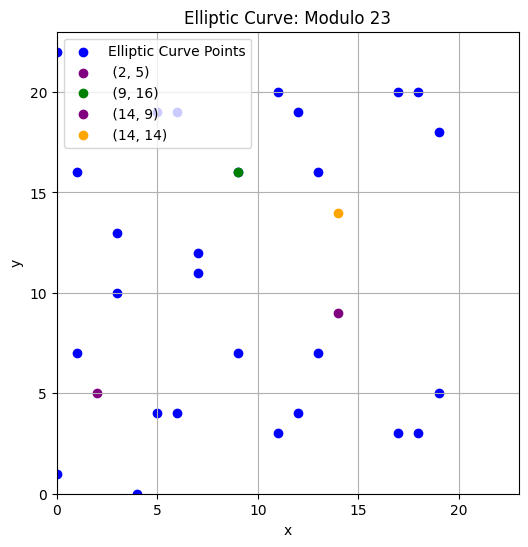

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Modular inverse helper function using extended Euclidean algorithm
def mod_inverse(a, p):
    return pow(a, p - 2, p)

# Function to calculate slope (m) between two points on the curve, mod p
def calculate_m(first_point, second_point, p):
    x1, y1 = first_point
    x2, y2 = second_point
    if x1 != x2:
        numerator = (y2 - y1) % p
        denominator = (x2 - x1) % p
        m = (numerator * mod_inverse(denominator, p)) % p
        return m
    else:
        return None  # Handle case where first_point and second_point are the same point

# Function to calculate xr, mod p
def calculate_xr(m, first_point, second_point, p):
    x1, y1 = first_point
    x2, y2 = second_point
    xr = (m**2 - x1 - x2) % p
    return xr

# Function to calculate yr, mod p
def calculate_yr(m, first_point, second_point, xr, p):
    x1, y1 = first_point
    yr = (m * (x1 - xr) - y1) % p
    return yr

# Function to plot the elliptic curve and given points, supporting a custom elliptic curve equation
def plot_elliptic_curve(first_point, second_point, curve_equation, p):
    # Calculate m, xr, yr, and the new point mod p
    m = calculate_m(first_point, second_point, p)
    if m is None:
        print("Points are the same; cannot calculate slope.")
        return
    xr = calculate_xr(m, first_point, second_point, p)
    yr = calculate_yr(m, first_point, second_point, xr, p)
    target_point = (xr, yr)

    # Generate a set of x values for plotting the elliptic curve mod p
    x_values = np.arange(0, p)

    # Calculate y^2 values from the custom elliptic curve equation mod p
    y_squared = curve_equation(x_values) % p

    # Plot the elliptic curve points (x, sqrt(y^2) mod p)
    points_on_curve = []
    for x in range(p):
        for y in range(p):
            if (y**2) % p == curve_equation(x) % p:
                points_on_curve.append((x, y))

    # Adjusting the plot to include the points and the curve
    plt.figure(figsize=(8, 6))

    # Plot the elliptic curve points
    x_curve, y_curve = zip(*points_on_curve)
    plt.scatter(x_curve, y_curve, color='blue', label='Elliptic Curve Points')

    # Plot the points first_point, second_point, target_point
    plt.scatter(*first_point, color='purple', label=f' {first_point}')
    plt.scatter(*second_point, color='green', label=f' {second_point}')
    plt.scatter(*target_point, color='purple', label=f' {target_point}')
    plt.scatter(target_point[0], -target_point[1] % p, color='orange', label=f' ({target_point[0]}, {-target_point[1] % p})')

    # Set axis limits based on modulo p
    plt.xlim(0, p)
    plt.ylim(0, p)

    # Set equal aspect ratio to ensure x and y scales are the same
    plt.gca().set_aspect('equal', adjustable='box')

    # Add labels, title, and grid
    plt.title(f"Elliptic Curve: Modulo {p}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()

    return target_point

# Example usage with modular arithmetic, p = 23:
p = 23
first_point = (2, 5)
second_point = (9, 16)

# Define a custom elliptic curve equation (mod p)
def custom_elliptic_curve(x):
    return (x**3 + x + 1) % p  # Elliptic curve y^2 = x^3 + x + 1 mod p

# Call the function to plot the curve and the points with modular arithmetic
third_point = plot_elliptic_curve(first_point, second_point, custom_elliptic_curve, p)


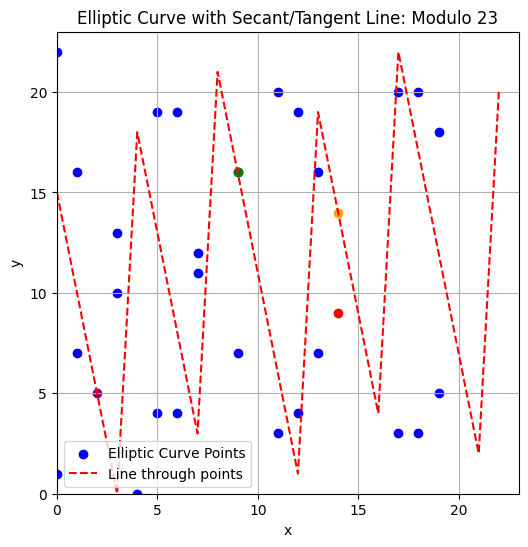

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Modular inverse helper function using extended Euclidean algorithm
def mod_inverse(a, p):
    return pow(a, p - 2, p)

# Function to calculate slope (m) between two points on the curve, mod p
def calculate_m(first_point, second_point, p):
    x1, y1 = first_point
    x2, y2 = second_point
    if x1 != x2:
        numerator = (y2 - y1) % p
        denominator = (x2 - x1) % p
        m = (numerator * mod_inverse(denominator, p)) % p
        return m
    else:
        return None  # Handle case where first_point and second_point are the same point

# Function to calculate xr, mod p
def calculate_xr(m, first_point, second_point, p):
    x1, y1 = first_point
    x2, y2 = second_point
    xr = (m**2 - x1 - x2) % p
    return xr

# Function to calculate yr, mod p
def calculate_yr(m, first_point, second_point, xr, p):
    x1, y1 = first_point
    yr = (m * (x1 - xr) - y1) % p
    return yr

# Function to calculate line y = mx + b
def calculate_line_y(m, b, x, p):
    return (m * x + b) % p

# Function to plot the elliptic curve and given points, supporting a custom elliptic curve equation
def plot_elliptic_curve_with_line(first_point, second_point, curve_equation, p):
    # Calculate m, xr, yr, and the new point mod p
    m = calculate_m(first_point, second_point, p)
    if m is None:
        print("Points are the same; cannot calculate slope.")
        return
    xr = calculate_xr(m, first_point, second_point, p)
    yr = calculate_yr(m, first_point, second_point, xr, p)
    target_point = (xr, yr)

    # Generate a set of x values for plotting the elliptic curve mod p
    x_values = np.arange(0, p)

    # Calculate y^2 values from the custom elliptic curve equation mod p
    y_squared = curve_equation(x_values) % p

    # Plot the elliptic curve points (x, sqrt(y^2) mod p)
    points_on_curve = []
    for x in range(p):
        for y in range(p):
            if (y**2) % p == curve_equation(x) % p:
                points_on_curve.append((x, y))

    # Calculate the intercept b for the line
    x1, y1 = first_point
    b = (y1 - m * x1) % p

    # Create a line based on the calculated slope and intercept
    line_points = [(x, calculate_line_y(m, b, x, p)) for x in range(p)]

    # Adjusting the plot to include the points, curve, and line
    plt.figure(figsize=(8, 6))

    # Plot the elliptic curve points
    x_curve, y_curve = zip(*points_on_curve)
    plt.scatter(x_curve, y_curve, color='blue', label='Elliptic Curve Points')

    # Plot the secant or tangent line
    x_line, y_line = zip(*line_points)
    plt.plot(x_line, y_line, color='red', linestyle='--', label='Line through points')

    # Plot the points first_point, second_point, target_point
    plt.scatter(*first_point, color='purple', label=f'')
    plt.scatter(*second_point, color='green', label=f'')
    plt.scatter(*target_point, color='red', label=f'')
    plt.scatter(target_point[0], -target_point[1] % p, color='orange', label=f'')

    # Set axis limits based on modulo p
    plt.xlim(0, p)
    plt.ylim(0, p)

    # Set equal aspect ratio to ensure x and y scales are the same
    plt.gca().set_aspect('equal', adjustable='box')

    # Add labels, title, and grid
    plt.title(f"Elliptic Curve with Secant/Tangent Line: Modulo {p}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()

    return target_point

# Example usage with modular arithmetic, p = 23:
p = 23
first_point = (2, 5)
second_point = (9, 16)

# Define a custom elliptic curve equation (mod p)
def custom_elliptic_curve(x):
    return (x**3 + x + 1) % p  # Elliptic curve y^2 = x^3 + x + 1 mod p

# Call the function to plot the curve, points, and secant/tangent line
third_point = plot_elliptic_curve_with_line(first_point, second_point, custom_elliptic_curve, p)


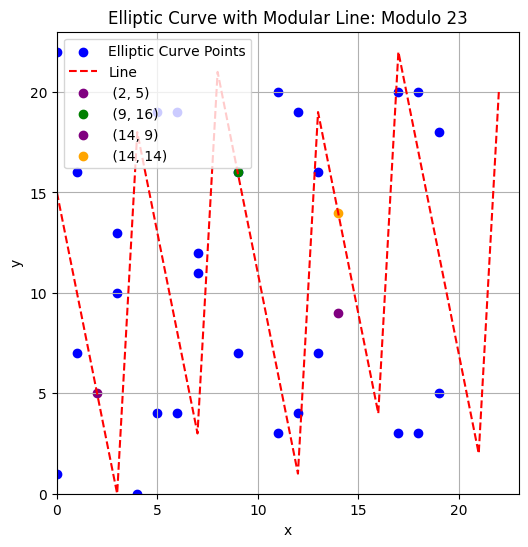

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Modular inverse helper function using extended Euclidean algorithm
def mod_inverse(a, p):
    return pow(a, p - 2, p)

# Function to calculate slope (m) between two points on the curve, mod p
def calculate_m(first_point, second_point, p):
    x1, y1 = first_point
    x2, y2 = second_point
    if x1 != x2:
        numerator = (y1 - y2) % p
        denominator = (x1 - x2) % p
        m = (numerator * mod_inverse(denominator, p)) % p
        return m
    else:
        return None  # Handle case where first_point and second_point are the same point

# Function to calculate xr, mod p
def calculate_xr(m, first_point, second_point, p):
    x1, y1 = first_point
    x2, y2 = second_point
    xr = (m**2 - x1 - x2) % p
    return xr

# Function to calculate yr, mod p
def calculate_yr(m, first_point, second_point, xr, p):
    x1, y1 = first_point
    yr = (m * (x1 - xr) - y1) % p
    return yr

# Function to calculate line y = mx + b in modular arithmetic
def calculate_line_y(m, b, x, p):
    return (m * x + b) % p

# Function to plot the elliptic curve and given points, supporting a custom elliptic curve equation
def plot_elliptic_curve_with_line(first_point, second_point, curve_equation, p):
    # Calculate m, xr, yr, and the new point mod p
    m = calculate_m(first_point, second_point, p)
    if m is None:
        print("Points are the same; cannot calculate slope.")
        return
    xr = calculate_xr(m, first_point, second_point, p)
    yr = calculate_yr(m, first_point, second_point, xr, p)
    target_point = (xr, yr)

    # Generate a set of x values for plotting the elliptic curve mod p
    x_values = np.arange(0, p)

    # Calculate y^2 values from the custom elliptic curve equation mod p
    y_squared = curve_equation(x_values) % p

    # Plot the elliptic curve points (x, sqrt(y^2) mod p)
    points_on_curve = []
    for x in range(p):
        for y in range(p):
            if (y**2) % p == curve_equation(x) % p:
                points_on_curve.append((x, y))

    # Calculate the intercept b for the line
    x1, y1 = first_point
    b = (y1 - m * x1) % p

    # Generate line points
    line_points = [(x, calculate_line_y(m, b, x, p)) for x in range(p)]

    # Adjusting the plot to include the points, curve, and line
    plt.figure(figsize=(8, 6))

    # Plot the elliptic curve points
    x_curve, y_curve = zip(*points_on_curve)
    plt.scatter(x_curve, y_curve, color='blue', label='Elliptic Curve Points')

    # Plot the secant or tangent line in a modular space
    x_line, y_line = zip(*line_points)
    plt.plot(x_line, y_line, color='red', linestyle='--', label='Line')

    # Plot the points first_point, second_point, target_point
    plt.scatter(*first_point, color='purple', label=f' {first_point}')
    plt.scatter(*second_point, color='green', label=f' {second_point}')
    plt.scatter(*target_point, color='purple', label=f' {target_point}')
    plt.scatter(target_point[0], -target_point[1] % p, color='orange', label=f' ({target_point[0]}, {-target_point[1] % p})')

    # Set axis limits based on modulo p
    plt.xlim(0, p)
    plt.ylim(0, p)

    # Set equal aspect ratio to ensure x and y scales are the same
    plt.gca().set_aspect('equal', adjustable='box')

    # Add labels, title, and grid
    plt.title(f"Elliptic Curve with Modular Line: Modulo {p}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()

    return target_point

# Example usage with modular arithmetic, p = 23:
p = 23
first_point = (2, 5)
second_point = (9, 16)

# Define a custom elliptic curve equation (mod p)
def custom_elliptic_curve(x):
    return (x**3 + x + 1) % p  # Elliptic curve y^2 = x^3 + x + 1 mod p

# Call the function to plot the curve, points, and secant/tangent line
third_point = plot_elliptic_curve_with_line(first_point, second_point, custom_elliptic_curve, p)

In [39]:
P = (2, 4)
Q = (5, 9)

p = 11

In [40]:
# y^2 = x^3 + x + 6
def curve_equation(x, p):
    return (x**3 + x + 6) % p

In [43]:
def calculate_slope_mod(P, Q, p):
  x1, y1 = P
  x2, y2 = Q
  slope = ((y2 - y1) / (x2 - x1)) % p
  return slope

def calculate_xr_mod(P, Q, slope, p):
  x1, y1 = P
  x2, y2 = Q
  xr = ((slope**2) - x1 - x2) % p
  return xr

def calculate_yr_mod(P, Q, slope, xr, p):
  x1, y1 = P
  yr = (slope * (x1 - xr) - y1) % p
  return yr

In [46]:
# Modular inverse helper function using extended Euclidean algorithm
def mod_inverse(a, p):
    """Returns the modular inverse of a under modulo p using Fermat's Little Theorem."""
    return pow(a, p - 2, p)

# Function to calculate slope (m) between two points on the curve, mod p
def calculate_slope_mod(P, Q, p):
    x1, y1 = P
    x2, y2 = Q
    if x1 == x2 and y1 == y2:
        # Use the formula for point doubling when P == Q
        numerator = (3 * x1**2) % p
        denominator = (2 * y1) % p
    else:
        # Use the formula for regular slope when P != Q
        numerator = (y2 - y1) % p
        denominator = (x2 - x1) % p

    if denominator == 0:
        raise ValueError("Slope is undefined (denominator is zero).")

    # Compute the slope as (numerator / denominator) % p, which is
    # numerator * mod_inverse(denominator, p) % p
    slope = (numerator * mod_inverse(denominator, p)) % p
    return slope

# Function to calculate xr, mod p
def calculate_xr_mod(P, Q, slope, p):
    x1, y1 = P
    x2, y2 = Q
    xr = (slope**2 - x1 - x2) % p
    return xr

# Function to calculate yr, mod p
def calculate_yr_mod(P, Q, slope, xr, p):
    x1, y1 = P
    yr = (slope * (x1 - xr) - y1) % p
    return yr


In [45]:
5/3

1.6666666666666667

In [47]:
m = calculate_slope_mod(P, Q, p)
print(f"Slope (m): {m}")

xr = calculate_xr_mod(P, Q, m, p)
print(f"xr: {xr}")

yr = calculate_yr_mod(P, Q, m, xr, p)
print(f"yr: {yr}")

Slope (m): 9
xr: 8
yr: 8
